In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

Using TensorFlow backend.


/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

# Ensemble models

In [3]:
# Parameters
MODELS = ['bb203f76-fc98-44ed-a8e6-2592c681457e', 'ec0a84dd-313b-44fc-9110-d72a62ee12a2']
SCORE = "accuracy"


In [4]:
models = MODELS
print("models: {}".format(models))

models: ['bb203f76-fc98-44ed-a8e6-2592c681457e', 'ec0a84dd-313b-44fc-9110-d72a62ee12a2']


In [5]:
sd = stacked_data(uuids=models)

  0%|          | 0/622 [00:00<?, ?it/s]

1072
889
Training points = 622
Benign: 349, Intermediate: 273, Malignant: 0

Validation points = 168
Benign: 96, Intermediate: 72, Malignant: 0

Testing points = 99
Benign: 54, Intermediate: 45, Malignant: 0
bone-china-046
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 1/622 [00:00<01:06,  9.29it/s]

bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 2/622 [00:00<01:08,  9.01it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 4/622 [00:00<01:16,  8.08it/s]

  1%|          | 5/622 [00:00<01:28,  6.96it/s]

bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.
bone-china-068
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 7/622 [00:00<01:20,  7.67it/s]

bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 8/622 [00:01<01:59,  5.15it/s]

  2%|▏         | 10/622 [00:01<01:33,  6.53it/s]

bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.
bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/622 [00:01<01:27,  7.01it/s]

  2%|▏         | 13/622 [00:01<01:12,  8.41it/s]

bone-china-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 15/622 [00:01<01:20,  7.57it/s]

bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 16/622 [00:02<01:28,  6.82it/s]

  3%|▎         | 18/622 [00:02<01:11,  8.47it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.
bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/622 [00:02<00:58, 10.31it/s]

  4%|▎         | 23/622 [00:02<00:50, 11.75it/s]

bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 25/622 [00:02<00:47, 12.47it/s]

  5%|▍         | 28/622 [00:02<00:40, 14.84it/s]

bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-china-020
Does this patient have T2 available? True
I'm doing the thing.
bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-china-107
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 30/622 [00:02<00:38, 15.39it/s]

bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 32/622 [00:03<00:50, 11.79it/s]

bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-china-089
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 35/622 [00:03<00:57, 10.13it/s]

  6%|▌         | 37/622 [00:03<00:54, 10.74it/s]

bone-china-081
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 39/622 [00:03<01:04,  8.99it/s]

bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 41/622 [00:04<01:35,  6.06it/s]

bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 42/622 [00:04<01:34,  6.15it/s]

  7%|▋         | 44/622 [00:04<01:15,  7.70it/s]

bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.
bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 46/622 [00:04<01:05,  8.75it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 48/622 [00:05<01:06,  8.61it/s]

  8%|▊         | 50/622 [00:05<00:56, 10.11it/s]

bone-china-151
Does this patient have T2 available? True
I'm doing the thing.
bone-china-146
Does this patient have T2 available? True
I'm doing the thing.
bone-china-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-038
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 52/622 [00:05<00:48, 11.80it/s]

bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


  9%|▊         | 54/622 [00:05<01:09,  8.14it/s]

bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-047
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 56/622 [00:06<01:22,  6.87it/s]

bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 57/622 [00:06<02:59,  3.14it/s]

  9%|▉         | 59/622 [00:07<02:17,  4.09it/s]

bone-china-114
Does this patient have T2 available? True
I'm doing the thing.
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.
bone-china-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 61/622 [00:07<01:44,  5.34it/s]

 10%|█         | 63/622 [00:07<01:22,  6.76it/s]

bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.
bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-485
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 66/622 [00:07<01:14,  7.51it/s]

 11%|█         | 68/622 [00:07<01:01,  9.03it/s]

bone-china-004
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 11%|█▏        | 70/622 [00:08<01:04,  8.59it/s]

bone-china-077
Does this patient have T2 available? True
I'm doing the thing.
bone-china-032
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 72/622 [00:08<00:57,  9.54it/s]

bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.
bone-china-120
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 74/622 [00:08<00:58,  9.35it/s]

bone-penn-074
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 76/622 [00:08<00:58,  9.35it/s]

 13%|█▎        | 79/622 [00:08<00:48, 11.09it/s]

bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 82/622 [00:08<00:41, 12.96it/s]

 14%|█▎        | 85/622 [00:09<00:36, 14.62it/s]

bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-china-148
Does this patient have T2 available? True
I'm doing the thing.
bone-china-149
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 87/622 [00:09<00:46, 11.48it/s]

bone-penn-005
Does this patient have T2 available? True
I'm doing the thing.
bone-china-031
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 89/622 [00:09<00:41, 12.98it/s]

bone-china-033
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-032
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 91/622 [00:09<00:50, 10.55it/s]

bone-penn-001
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 93/622 [00:09<00:52, 10.03it/s]

bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 95/622 [00:10<00:49, 10.63it/s]

bone-china-053
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 97/622 [00:10<01:12,  7.22it/s]

 16%|█▌        | 98/622 [00:10<01:19,  6.61it/s]

bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.
bone-china-166
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 100/622 [00:10<01:04,  8.04it/s]

bone-penn-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 102/622 [00:11<01:14,  7.00it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 105/622 [00:11<01:00,  8.61it/s]

bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.
bone-china-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 107/622 [00:11<01:09,  7.45it/s]

bone-china-101
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 109/622 [00:11<01:02,  8.25it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 111/622 [00:12<01:05,  7.86it/s]

 18%|█▊        | 112/622 [00:12<01:07,  7.54it/s]

bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.
bone-china-109
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 114/622 [00:12<00:58,  8.76it/s]

bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 116/622 [00:12<01:00,  8.39it/s]

bone-china-160
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-067
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 118/622 [00:12<00:52,  9.59it/s]

bone-china-112
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 120/622 [00:13<01:01,  8.12it/s]

 20%|█▉        | 122/622 [00:13<00:51,  9.71it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 124/622 [00:13<00:59,  8.31it/s]

bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 126/622 [00:13<01:01,  8.02it/s]

bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-027
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 128/622 [00:14<00:59,  8.32it/s]

bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 129/622 [00:14<02:23,  3.44it/s]

bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 132/622 [00:15<01:50,  4.45it/s]

 21%|██▏       | 133/622 [00:15<01:40,  4.89it/s]

bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.
bone-china-110
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 135/622 [00:15<01:21,  5.99it/s]

bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.
bone-china-140
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-070
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 137/622 [00:15<01:29,  5.43it/s]

bone-china-010
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 139/622 [00:16<01:27,  5.49it/s]

bone-china-044
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 141/622 [00:16<01:17,  6.20it/s]

bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 143/622 [00:16<01:10,  6.79it/s]

 23%|██▎       | 145/622 [00:16<00:56,  8.46it/s]

bone-china-060
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 147/622 [00:16<00:52,  9.10it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 149/622 [00:17<00:50,  9.31it/s]

 24%|██▍       | 151/622 [00:17<00:43, 10.86it/s]

bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-028
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 153/622 [00:17<00:39, 11.97it/s]

 25%|██▍       | 155/622 [00:17<00:35, 13.11it/s]

bone-china-085
Does this patient have T2 available? True
I'm doing the thing.
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.
bone-china-103
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 157/622 [00:17<00:31, 14.59it/s]

bone-china-034
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 160/622 [00:17<00:33, 13.61it/s]

bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 162/622 [00:18<00:54,  8.41it/s]

 26%|██▋       | 164/622 [00:18<00:46,  9.75it/s]

bone-china-100
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-042
Does this patient have T2 available? True
I'm doing the thing.
bone-china-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 166/622 [00:18<00:55,  8.24it/s]

bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-004
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 168/622 [00:18<00:54,  8.30it/s]

bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 170/622 [00:19<00:58,  7.75it/s]

bone-china-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-051
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 172/622 [00:19<01:07,  6.67it/s]

bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 173/622 [00:20<01:31,  4.92it/s]

bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 174/622 [00:20<01:37,  4.61it/s]

 28%|██▊       | 177/622 [00:20<01:13,  6.05it/s]

bone-china-073
Does this patient have T2 available? True
I'm doing the thing.
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 179/622 [00:20<01:07,  6.52it/s]

bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 180/622 [00:20<01:03,  6.99it/s]

 29%|██▉       | 182/622 [00:20<00:51,  8.54it/s]

bone-china-135
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 184/622 [00:21<00:48,  9.09it/s]

bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 186/622 [00:21<00:51,  8.45it/s]

 30%|███       | 189/622 [00:21<00:42, 10.23it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-china-158
Does this patient have T2 available? True
I'm doing the thing.
bone-china-132
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 191/622 [00:21<00:37, 11.38it/s]

bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 193/622 [00:21<00:43,  9.79it/s]

 31%|███▏      | 195/622 [00:21<00:37, 11.34it/s]

bone-penn-413
Does this patient have T2 available? True
I'm doing the thing.
bone-china-092
Does this patient have T2 available? True
I'm doing the thing.
bone-china-086
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 197/622 [00:22<00:34, 12.16it/s]

 32%|███▏      | 199/622 [00:22<00:30, 13.68it/s]

bone-china-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.
bone-china-045
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 201/622 [00:22<00:28, 14.86it/s]

 33%|███▎      | 203/622 [00:22<00:26, 15.97it/s]

bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 205/622 [00:22<00:27, 15.10it/s]

bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 207/622 [00:22<00:32, 12.77it/s]

 34%|███▎      | 209/622 [00:22<00:30, 13.47it/s]

bone-china-091
Does this patient have T2 available? True
I'm doing the thing.
bone-china-134
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.
bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 213/622 [00:23<00:27, 15.06it/s]

bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.
bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 216/622 [00:23<00:24, 16.47it/s]

bone-china-075
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 218/622 [00:23<00:28, 14.06it/s]

 35%|███▌      | 220/622 [00:23<00:27, 14.71it/s]

bone-penn-057
Does this patient have T2 available? True
I'm doing the thing.
bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.
bone-china-006
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 222/622 [00:23<00:25, 15.39it/s]

bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 224/622 [00:24<00:38, 10.45it/s]

bone-china-016
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-062
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 226/622 [00:24<01:06,  5.94it/s]

bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 228/622 [00:24<01:01,  6.46it/s]

 37%|███▋      | 231/622 [00:25<00:47,  8.15it/s]

bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.
bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-china-083
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 234/622 [00:25<00:39,  9.87it/s]

bone-china-099
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.
bone-china-121
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 236/622 [00:25<00:35, 10.90it/s]

 38%|███▊      | 238/622 [00:25<00:33, 11.38it/s]

bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▊      | 240/622 [00:25<00:44,  8.66it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 242/622 [00:26<00:43,  8.73it/s]

bone-china-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 245/622 [00:26<00:37, 10.02it/s]

bone-china-042
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 247/622 [00:26<00:42,  8.73it/s]

bone-china-153
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 249/622 [00:26<00:42,  8.81it/s]

bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 251/622 [00:27<00:48,  7.72it/s]

 41%|████      | 253/622 [00:27<00:43,  8.40it/s]

bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 254/622 [00:27<00:43,  8.56it/s]

bone-china-080
Does this patient have T2 available? True
I'm doing the thing.
bone-china-087
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 41%|████▏     | 257/622 [00:27<00:39,  9.34it/s]

 42%|████▏     | 260/622 [00:27<00:32, 11.14it/s]

bone-hup-330
Does this patient have T2 available? True
I'm doing the thing.
bone-china-131
Does this patient have T2 available? True
I'm doing the thing.
bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-104
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 262/622 [00:28<00:29, 12.22it/s]

 43%|████▎     | 265/622 [00:28<00:25, 14.24it/s]

bone-china-155
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 267/622 [00:28<00:26, 13.65it/s]

bone-penn-045
Does this patient have T2 available? True
I'm doing the thing.
bone-china-084
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 269/622 [00:28<00:25, 14.00it/s]

bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 271/622 [00:28<00:31, 11.10it/s]

 44%|████▍     | 273/622 [00:28<00:32, 10.89it/s]

bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.
bone-china-138
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 275/622 [00:29<00:27, 12.57it/s]

bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.
bone-china-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 278/622 [00:29<00:25, 13.56it/s]

bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 280/622 [00:29<00:29, 11.60it/s]

 45%|████▌     | 283/622 [00:29<00:25, 13.18it/s]

bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.
bone-china-049
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 285/622 [00:29<00:39,  8.57it/s]

bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.
bone-china-059
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 287/622 [00:30<00:33,  9.99it/s]

 46%|████▋     | 289/622 [00:30<00:33, 10.01it/s]

bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.
bone-china-001
Does this patient have T2 available? True
I'm doing the thing.
bone-china-047
Does this patient have T2 available? True
I'm doing the thing.


bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-058
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 292/622 [00:30<00:34,  9.46it/s]

 47%|████▋     | 294/622 [00:30<00:32,  9.97it/s]

bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-076
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 296/622 [00:30<00:28, 11.34it/s]

 48%|████▊     | 298/622 [00:31<00:28, 11.41it/s]

bone-china-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-015
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 300/622 [00:31<00:31, 10.08it/s]

bone-penn-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 302/622 [00:31<00:33,  9.50it/s]

bone-china-015
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 304/622 [00:31<00:32,  9.66it/s]

 49%|████▉     | 306/622 [00:31<00:29, 10.64it/s]

bone-penn-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-china-061
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 309/622 [00:32<00:24, 13.03it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.
bone-china-152
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 311/622 [00:32<00:26, 11.68it/s]

bone-china-002
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 313/622 [00:32<00:30, 10.25it/s]

 51%|█████     | 315/622 [00:32<00:26, 11.44it/s]

bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 317/622 [00:32<00:28, 10.85it/s]

bone-china-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.
bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 319/622 [00:33<00:40,  7.48it/s]

bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 321/622 [00:33<00:39,  7.69it/s]

bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 323/622 [00:34<00:52,  5.68it/s]

 52%|█████▏    | 324/622 [00:34<00:54,  5.47it/s]

bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-037
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 326/622 [00:34<00:42,  6.94it/s]

bone-china-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 328/622 [00:34<00:43,  6.83it/s]

bone-china-161
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 330/622 [00:35<00:40,  7.19it/s]

 53%|█████▎    | 331/622 [00:35<00:41,  6.96it/s]

bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 332/622 [00:35<00:38,  7.47it/s]

 54%|█████▎    | 333/622 [00:35<00:36,  7.87it/s]

bone-penn-061
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 335/622 [00:35<00:36,  7.87it/s]

bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 336/622 [00:36<00:58,  4.88it/s]

 55%|█████▍    | 339/622 [00:36<00:45,  6.16it/s]

bone-china-038
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-002
Does this patient have T2 available? True
I'm doing the thing.
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 342/622 [00:36<00:39,  7.15it/s]

bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 344/622 [00:36<00:44,  6.24it/s]

bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 345/622 [00:37<01:05,  4.20it/s]

 56%|█████▌    | 346/622 [00:37<00:59,  4.67it/s]

bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.
bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 348/622 [00:37<00:46,  5.95it/s]

 56%|█████▋    | 350/622 [00:37<00:39,  6.88it/s]

bone-china-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-030
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 352/622 [00:37<00:32,  8.44it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-011
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 354/622 [00:38<00:28,  9.29it/s]

 57%|█████▋    | 356/622 [00:38<00:25, 10.34it/s]

bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 358/622 [00:38<00:27,  9.50it/s]

bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-311
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 360/622 [00:38<00:29,  8.85it/s]

bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 362/622 [00:38<00:25, 10.20it/s]

bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.
bone-china-195
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 364/622 [00:39<00:26,  9.57it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 366/622 [00:39<00:30,  8.26it/s]

 59%|█████▉    | 367/622 [00:39<00:35,  7.20it/s]

bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.
bone-china-203
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 369/622 [00:39<00:29,  8.60it/s]

 60%|█████▉    | 371/622 [00:39<00:24, 10.06it/s]

bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 373/622 [00:40<00:24,  9.98it/s]

bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 376/622 [00:40<00:21, 11.32it/s]

bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 378/622 [00:40<00:33,  7.23it/s]

bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 380/622 [00:40<00:31,  7.66it/s]

 61%|██████▏   | 382/622 [00:41<00:26,  9.00it/s]

bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 385/622 [00:41<00:21, 10.87it/s]

 62%|██████▏   | 387/622 [00:41<00:20, 11.74it/s]

bone-china-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.
bone-china-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 389/622 [00:41<00:24,  9.60it/s]

bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 391/622 [00:41<00:27,  8.30it/s]

bone-china-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-024
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 393/622 [00:42<00:26,  8.80it/s]

bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 396/622 [00:42<00:27,  8.21it/s]

 64%|██████▍   | 397/622 [00:42<00:27,  8.22it/s]

bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 399/622 [00:42<00:25,  8.74it/s]

bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-029
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 400/622 [00:43<00:33,  6.72it/s]

 64%|██████▍   | 401/622 [00:43<00:31,  7.11it/s]

bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 403/622 [00:43<00:26,  8.25it/s]

 65%|██████▌   | 405/622 [00:43<00:22,  9.48it/s]

bone-china-188
Does this patient have T2 available? True
I'm doing the thing.
bone-china-210
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 407/622 [00:43<00:24,  8.77it/s]

bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 408/622 [00:43<00:24,  8.82it/s]

 66%|██████▌   | 409/622 [00:44<00:23,  8.98it/s]

bone-hup-97
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 412/622 [00:44<00:20, 10.05it/s]

 67%|██████▋   | 414/622 [00:44<00:20, 10.03it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.
bone-china-223
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-82
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 416/622 [00:44<00:20, 10.12it/s]

bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 418/622 [00:44<00:19, 10.74it/s]

bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 420/622 [00:44<00:19, 10.43it/s]

bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 422/622 [00:45<00:28,  7.11it/s]

bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 423/622 [00:45<00:39,  5.04it/s]

 68%|██████▊   | 424/622 [00:45<00:37,  5.25it/s]

bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 425/622 [00:46<00:49,  3.95it/s]

bone-china-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 427/622 [00:46<00:43,  4.45it/s]

bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 429/622 [00:47<00:41,  4.62it/s]

 69%|██████▉   | 430/622 [00:47<00:37,  5.17it/s]

bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.
bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 431/622 [00:47<00:35,  5.39it/s]

 70%|██████▉   | 433/622 [00:47<00:30,  6.25it/s]

bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 435/622 [00:47<00:24,  7.55it/s]

bone-penn-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 437/622 [00:48<00:26,  6.97it/s]

bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 438/622 [00:48<00:31,  5.89it/s]

 71%|███████   | 440/622 [00:48<00:26,  6.93it/s]

bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-214
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 442/622 [00:48<00:25,  7.14it/s]

bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 444/622 [00:48<00:20,  8.51it/s]

bone-china-215
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 446/622 [00:49<00:34,  5.13it/s]

 72%|███████▏  | 447/622 [00:49<00:32,  5.40it/s]

bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 448/622 [00:50<00:40,  4.28it/s]

 72%|███████▏  | 450/622 [00:50<00:31,  5.48it/s]

bone-china-234
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 452/622 [00:50<00:26,  6.50it/s]

bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 454/622 [00:50<00:23,  7.13it/s]

 73%|███████▎  | 456/622 [00:50<00:19,  8.64it/s]

bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 458/622 [00:51<00:24,  6.72it/s]

bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 459/622 [00:51<00:34,  4.71it/s]

 74%|███████▍  | 461/622 [00:51<00:26,  5.99it/s]

bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 463/622 [00:51<00:24,  6.44it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 464/622 [00:52<00:31,  4.98it/s]

 75%|███████▍  | 465/622 [00:52<00:26,  5.84it/s]

bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 467/622 [00:52<00:22,  6.88it/s]

bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 469/622 [00:53<00:27,  5.49it/s]

 76%|███████▌  | 471/622 [00:53<00:22,  6.69it/s]

bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.
bone-china-177
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 472/622 [00:53<00:22,  6.68it/s]

 76%|███████▋  | 475/622 [00:53<00:17,  8.53it/s]

bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-006
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 477/622 [00:54<00:25,  5.76it/s]

bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 479/622 [00:54<00:23,  6.18it/s]

 77%|███████▋  | 480/622 [00:54<00:20,  6.94it/s]

bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 482/622 [00:54<00:18,  7.44it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 484/622 [00:54<00:16,  8.27it/s]

bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 485/622 [00:55<00:22,  6.02it/s]

bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 486/622 [00:55<00:26,  5.15it/s]

bone-penn-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 488/622 [00:55<00:23,  5.67it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 489/622 [00:55<00:27,  4.88it/s]

bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 490/622 [00:56<00:34,  3.88it/s]

bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-179
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 492/622 [00:56<00:29,  4.40it/s]

 79%|███████▉  | 493/622 [00:56<00:24,  5.18it/s]

bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 495/622 [00:56<00:19,  6.42it/s]

 80%|███████▉  | 496/622 [00:57<00:18,  6.93it/s]

bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 498/622 [00:57<00:15,  8.10it/s]

bone-china-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 500/622 [00:57<00:17,  6.90it/s]

bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 501/622 [00:57<00:24,  4.97it/s]

bone-penn-020
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 503/622 [00:58<00:21,  5.50it/s]

 82%|████████▏ | 507/622 [00:58<00:15,  7.26it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 509/622 [00:58<00:17,  6.52it/s]

bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 511/622 [00:58<00:13,  8.10it/s]

bone-penn-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-010
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 513/622 [00:59<00:14,  7.77it/s]

bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-052
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 515/622 [00:59<00:16,  6.51it/s]

 83%|████████▎ | 518/622 [00:59<00:12,  8.08it/s]

bone-penn-073
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▎ | 520/622 [00:59<00:11,  9.08it/s]

 84%|████████▍ | 522/622 [00:59<00:09, 10.36it/s]

bone-penn-063
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-069
Does this patient have T2 available? True
I'm doing the thing.
bone-china-209
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 525/622 [01:00<00:08, 12.08it/s]

bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 527/622 [01:00<00:07, 13.25it/s]

bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 529/622 [01:00<00:08, 11.42it/s]

 85%|████████▌ | 531/622 [01:00<00:08, 10.94it/s]

bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 533/622 [01:00<00:08, 10.84it/s]

bone-penn-405
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 535/622 [01:00<00:07, 12.34it/s]

bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 537/622 [01:01<00:08,  9.92it/s]

bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 539/622 [01:01<00:12,  6.90it/s]

 87%|████████▋ | 540/622 [01:01<00:12,  6.49it/s]

bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 541/622 [01:02<00:11,  7.13it/s]

 87%|████████▋ | 543/622 [01:02<00:10,  7.85it/s]

bone-china-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 545/622 [01:02<00:08,  9.52it/s]

bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 547/622 [01:02<00:07,  9.88it/s]

 88%|████████▊ | 550/622 [01:02<00:06, 11.22it/s]

bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 552/622 [01:02<00:07,  9.34it/s]

bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-018
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-072
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 554/622 [01:03<00:09,  6.90it/s]

 89%|████████▉ | 555/622 [01:03<00:09,  6.81it/s]

bone-penn-546
Does this patient have T2 available? True
I'm doing the thing.
bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 557/622 [01:04<00:13,  4.67it/s]

bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-227
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 559/622 [01:04<00:14,  4.37it/s]

 90%|█████████ | 561/622 [01:05<00:11,  5.37it/s]

bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 563/622 [01:05<00:08,  6.60it/s]

bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.
bone-china-198
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 565/622 [01:05<00:07,  7.84it/s]

bone-penn-223
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 567/622 [01:05<00:08,  6.36it/s]

bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████▏| 569/622 [01:05<00:06,  7.59it/s]

bone-china-199
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 571/622 [01:06<00:06,  8.02it/s]

bone-penn-064
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 573/622 [01:06<00:06,  7.36it/s]

bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 575/622 [01:06<00:06,  7.83it/s]

 93%|█████████▎| 578/622 [01:06<00:04,  9.87it/s]

bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 580/622 [01:06<00:03, 10.62it/s]

 94%|█████████▎| 582/622 [01:07<00:03, 11.11it/s]

bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-079
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 584/622 [01:07<00:03,  9.75it/s]

bone-penn-652
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 586/622 [01:07<00:03, 10.75it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.
bone-china-243
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 588/622 [01:07<00:03,  9.67it/s]

 95%|█████████▍| 590/622 [01:07<00:02, 10.94it/s]

bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 592/622 [01:08<00:02, 11.82it/s]

bone-china-194
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 594/622 [01:08<00:02, 10.92it/s]

 96%|█████████▌| 597/622 [01:08<00:02, 12.06it/s]

bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-041
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▋| 599/622 [01:08<00:02,  9.83it/s]

 97%|█████████▋| 602/622 [01:08<00:01, 11.81it/s]

bone-china-184
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 604/622 [01:09<00:01, 12.23it/s]

bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 606/622 [01:09<00:02,  7.56it/s]

bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 608/622 [01:09<00:01,  8.69it/s]

bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 610/622 [01:09<00:01,  9.57it/s]

bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 612/622 [01:10<00:01,  7.05it/s]

bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 614/622 [01:10<00:01,  7.53it/s]

 99%|█████████▉| 616/622 [01:10<00:00,  8.77it/s]

bone-china-222
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.
bone-china-221
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 618/622 [01:10<00:00,  9.21it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 621/622 [01:10<00:00, 11.01it/s]

bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


100%|██████████| 622/622 [01:11<00:00,  8.72it/s]


  0%|          | 0/168 [00:00<?, ?it/s]

  1%|          | 2/168 [00:00<00:09, 18.34it/s]

bone-penn-113
Does this patient have T2 available? True
I'm doing the thing.
bone-china-003
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.
bone-china-078
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 4/168 [00:00<00:09, 17.28it/s]

bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 5/168 [00:00<00:21,  7.43it/s]

bone-penn-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 7/168 [00:00<00:22,  7.21it/s]

  5%|▍         | 8/168 [00:01<00:24,  6.59it/s]

bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-031
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 10/168 [00:01<00:26,  5.99it/s]

  7%|▋         | 11/168 [00:01<00:24,  6.38it/s]

bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.
bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 14/168 [00:01<00:19,  7.80it/s]

bone-china-145
Does this patient have T2 available? True
I'm doing the thing.
bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 16/168 [00:01<00:16,  9.16it/s]

bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 18/168 [00:02<00:18,  8.02it/s]

 11%|█▏        | 19/168 [00:02<00:19,  7.46it/s]

bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 20/168 [00:02<00:23,  6.41it/s]

 12%|█▎        | 21/168 [00:02<00:24,  5.98it/s]

bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 23/168 [00:02<00:20,  7.19it/s]

bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.
bone-china-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 25/168 [00:03<00:18,  7.67it/s]

 16%|█▌        | 27/168 [00:03<00:16,  8.46it/s]

bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.
bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 28/168 [00:03<00:17,  7.87it/s]

bone-china-025
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 30/168 [00:03<00:17,  7.84it/s]

bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.
bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 33/168 [00:03<00:14,  9.01it/s]

 21%|██        | 35/168 [00:04<00:14,  9.44it/s]

bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.
bone-china-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-109
Does this patient have T2 available? True
I'm doing the thing.


bone-china-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-016
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 38/168 [00:04<00:13,  9.90it/s]

 24%|██▍       | 40/168 [00:04<00:11, 11.09it/s]

bone-china-028
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 42/168 [00:04<00:11, 10.96it/s]

bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 45/168 [00:04<00:11, 11.15it/s]

 29%|██▊       | 48/168 [00:05<00:09, 12.38it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-156
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 50/168 [00:05<00:09, 12.48it/s]

 31%|███       | 52/168 [00:05<00:08, 13.12it/s]

bone-china-051
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-077
Does this patient have T2 available? True
I'm doing the thing.
bone-china-050
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 54/168 [00:05<00:11, 10.25it/s]

bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-049
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 56/168 [00:05<00:11,  9.35it/s]

bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 58/168 [00:06<00:12,  8.96it/s]

 36%|███▌      | 60/168 [00:06<00:10, 10.25it/s]

bone-china-113
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 62/168 [00:06<00:10, 10.25it/s]

 38%|███▊      | 64/168 [00:06<00:08, 11.73it/s]

bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-068
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 66/168 [00:06<00:09, 10.22it/s]

bone-penn-007
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.
bone-china-005
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 68/168 [00:07<00:08, 11.67it/s]

 42%|████▏     | 70/168 [00:07<00:08, 11.75it/s]

bone-penn-039
Does this patient have T2 available? True
I'm doing the thing.
bone-china-039
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 72/168 [00:07<00:14,  6.85it/s]

 44%|████▍     | 74/168 [00:07<00:11,  8.52it/s]

bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 76/168 [00:08<00:10,  8.49it/s]

 46%|████▋     | 78/168 [00:08<00:09,  9.76it/s]

bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.
bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 80/168 [00:08<00:08, 10.41it/s]

bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.
bone-china-133
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 82/168 [00:08<00:09,  8.87it/s]

 50%|█████     | 84/168 [00:08<00:08,  9.79it/s]

bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-040
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 86/168 [00:09<00:08,  9.57it/s]

bone-china-093
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 88/168 [00:09<00:08,  9.35it/s]

bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 91/168 [00:09<00:08,  8.67it/s]

 55%|█████▌    | 93/168 [00:09<00:07, 10.10it/s]

bone-penn-078
Does this patient have T2 available? True
I'm doing the thing.
bone-china-043
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 95/168 [00:09<00:06, 11.74it/s]

bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-059
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 97/168 [00:10<00:07,  8.90it/s]

bone-hup-229
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-044
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 100/168 [00:10<00:07,  8.89it/s]

bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.
bone-china-242
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 102/168 [00:10<00:07,  9.14it/s]

bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.
bone-china-225
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 104/168 [00:11<00:07,  8.64it/s]

bone-penn-048
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▎   | 105/168 [00:11<00:12,  5.04it/s]

 63%|██████▎   | 106/168 [00:11<00:11,  5.32it/s]

bone-penn-603
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 108/168 [00:11<00:09,  6.65it/s]

 65%|██████▌   | 110/168 [00:11<00:07,  8.17it/s]

bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 112/168 [00:12<00:08,  6.24it/s]

bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-065
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 113/168 [00:12<00:13,  3.96it/s]

 68%|██████▊   | 115/168 [00:13<00:10,  5.01it/s]

bone-china-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 116/168 [00:13<00:12,  4.03it/s]

 70%|███████   | 118/168 [00:13<00:09,  5.22it/s]

bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 120/168 [00:13<00:07,  6.32it/s]

bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-220
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 122/168 [00:13<00:06,  7.30it/s]

 74%|███████▍  | 124/168 [00:13<00:05,  8.75it/s]

bone-penn-019
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-013
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 126/168 [00:14<00:05,  8.39it/s]

 76%|███████▌  | 128/168 [00:14<00:04,  9.88it/s]

bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-021
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 131/168 [00:14<00:03, 10.34it/s]

 79%|███████▉  | 133/168 [00:14<00:03, 11.43it/s]

bone-hup-227
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 135/168 [00:15<00:03,  9.47it/s]

 82%|████████▏ | 137/168 [00:15<00:02, 11.13it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.
bone-china-217
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-053
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 139/168 [00:15<00:02, 12.26it/s]

bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 141/168 [00:16<00:04,  5.78it/s]

 85%|████████▌ | 143/168 [00:16<00:03,  6.97it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 145/168 [00:16<00:03,  7.66it/s]

bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 148/168 [00:16<00:02,  9.06it/s]

 89%|████████▉ | 150/168 [00:16<00:01, 10.18it/s]

bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 152/168 [00:17<00:01,  8.14it/s]

bone-penn-075
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 154/168 [00:17<00:01,  8.38it/s]

bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 156/168 [00:17<00:01,  8.19it/s]

 93%|█████████▎| 157/168 [00:17<00:01,  7.45it/s]

bone-penn-207
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 158/168 [00:17<00:01,  7.75it/s]

 95%|█████████▌| 160/168 [00:17<00:00,  8.82it/s]

bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 161/168 [00:18<00:01,  5.87it/s]

 96%|█████████▋| 162/168 [00:18<00:00,  6.58it/s]

bone-hup-92
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-034
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 163/168 [00:19<00:01,  3.07it/s]

 98%|█████████▊| 164/168 [00:19<00:01,  3.65it/s]

bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-210
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 165/168 [00:19<00:00,  4.50it/s]

bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 167/168 [00:19<00:00,  4.89it/s]

100%|██████████| 168/168 [00:19<00:00,  8.51it/s]


  0%|          | 0/99 [00:00<?, ?it/s]

  2%|▏         | 2/99 [00:00<00:05, 17.57it/s]

bone-china-189
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 4/99 [00:00<00:05, 17.34it/s]

  7%|▋         | 7/99 [00:00<00:05, 18.27it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 10/99 [00:00<00:05, 17.51it/s]

bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 12/99 [00:00<00:06, 14.21it/s]

bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 15/99 [00:01<00:07, 11.14it/s]

bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 17/99 [00:01<00:10,  7.64it/s]

bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 18/99 [00:01<00:15,  5.19it/s]

 19%|█▉        | 19/99 [00:02<00:15,  5.30it/s]

bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 21/99 [00:02<00:11,  6.53it/s]

bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 24/99 [00:02<00:09,  8.08it/s]

bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 27/99 [00:03<00:10,  6.78it/s]

 29%|██▉       | 29/99 [00:03<00:09,  7.55it/s]

bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 30/99 [00:03<00:08,  7.87it/s]

 32%|███▏      | 32/99 [00:03<00:07,  9.42it/s]

bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 34/99 [00:03<00:09,  7.01it/s]

bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-114
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 35/99 [00:04<00:09,  6.43it/s]

bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 36/99 [00:04<00:11,  5.33it/s]

bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/99 [00:04<00:12,  4.90it/s]

bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 38/99 [00:04<00:12,  4.71it/s]

 40%|████      | 40/99 [00:04<00:09,  5.99it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 42/99 [00:05<00:09,  6.13it/s]

 44%|████▍     | 44/99 [00:05<00:07,  6.95it/s]

bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▋     | 46/99 [00:05<00:06,  7.73it/s]

bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 47/99 [00:05<00:07,  7.35it/s]

 48%|████▊     | 48/99 [00:05<00:06,  7.65it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.
bone-china-150
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 51/99 [00:06<00:05,  9.56it/s]

 54%|█████▎    | 53/99 [00:06<00:04, 10.14it/s]

bone-china-141
Does this patient have T2 available? True
I'm doing the thing.
bone-china-142
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 56/99 [00:06<00:03, 12.26it/s]

bone-china-157
Does this patient have T2 available? True
I'm doing the thing.
bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-china-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 58/99 [00:06<00:03, 12.91it/s]

bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 60/99 [00:06<00:04,  8.54it/s]

bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 62/99 [00:07<00:05,  6.56it/s]

 66%|██████▌   | 65/99 [00:07<00:03,  8.55it/s]

bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-china-090
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 67/99 [00:07<00:03, 10.04it/s]

 70%|██████▉   | 69/99 [00:07<00:02, 11.25it/s]

bone-china-064
Does this patient have T2 available? True
I'm doing the thing.
bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-china-007
Does this patient have T2 available? True
I'm doing the thing.
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-china-013
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 72/99 [00:07<00:02, 13.41it/s]

bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 74/99 [00:09<00:07,  3.15it/s]

 77%|███████▋  | 76/99 [00:09<00:05,  4.13it/s]

bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.
bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-china-232
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 78/99 [00:09<00:03,  5.35it/s]

 81%|████████  | 80/99 [00:10<00:02,  6.37it/s]

bone-china-182
Does this patient have T2 available? True
I'm doing the thing.
bone-china-229
Does this patient have T2 available? True
I'm doing the thing.
bone-china-208
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 83/99 [00:10<00:01,  8.08it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-202
Does this patient have T2 available? True
I'm doing the thing.
bone-china-241
Does this patient have T2 available? True
I'm doing the thing.
bone-china-233
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 86/99 [00:10<00:01,  9.47it/s]

bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 88/99 [00:10<00:01,  8.66it/s]

bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 90/99 [00:10<00:01,  8.57it/s]

 93%|█████████▎| 92/99 [00:11<00:00, 10.18it/s]

bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 94/99 [00:11<00:00,  9.13it/s]

 97%|█████████▋| 96/99 [00:11<00:00, 10.66it/s]

bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 98/99 [00:11<00:00, 11.37it/s]

100%|██████████| 99/99 [00:11<00:00,  8.48it/s]

bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.
622
99
168


  0%|          | 0/622 [00:00<?, ?it/s]

1072
889
Training points = 622
Benign: 349, Intermediate: 273, Malignant: 0

Validation points = 168
Benign: 96, Intermediate: 72, Malignant: 0

Testing points = 99
Benign: 54, Intermediate: 45, Malignant: 0
bone-china-046
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 2/622 [00:00<00:58, 10.52it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 4/622 [00:00<01:06,  9.28it/s]

  1%|          | 5/622 [00:00<01:16,  8.03it/s]

bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.
bone-china-068
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 7/622 [00:00<01:10,  8.75it/s]

bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 8/622 [00:01<01:41,  6.05it/s]

  2%|▏         | 10/622 [00:01<01:21,  7.47it/s]

bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.
bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/622 [00:01<01:19,  7.67it/s]

  2%|▏         | 13/622 [00:01<01:07,  9.00it/s]

bone-china-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 15/622 [00:01<01:16,  7.89it/s]

bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 16/622 [00:01<01:26,  7.03it/s]

  3%|▎         | 18/622 [00:02<01:09,  8.63it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.
bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/622 [00:02<00:57, 10.39it/s]

  4%|▎         | 23/622 [00:02<00:51, 11.65it/s]

bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 25/622 [00:02<00:48, 12.33it/s]

  5%|▍         | 28/622 [00:02<00:40, 14.62it/s]

bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-china-020
Does this patient have T2 available? True
I'm doing the thing.
bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-china-107
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 30/622 [00:02<00:39, 15.10it/s]

bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 32/622 [00:03<00:51, 11.39it/s]

bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-china-089
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 35/622 [00:03<00:57, 10.16it/s]

  6%|▌         | 37/622 [00:03<00:54, 10.74it/s]

bone-china-081
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 39/622 [00:03<01:03,  9.18it/s]

bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 41/622 [00:04<01:36,  6.03it/s]

bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 42/622 [00:04<01:34,  6.13it/s]

  7%|▋         | 44/622 [00:04<01:15,  7.63it/s]

bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.
bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 46/622 [00:04<01:07,  8.59it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 48/622 [00:05<01:07,  8.54it/s]

  8%|▊         | 50/622 [00:05<00:57,  9.98it/s]

bone-china-151
Does this patient have T2 available? True
I'm doing the thing.
bone-china-146
Does this patient have T2 available? True
I'm doing the thing.
bone-china-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-038
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 52/622 [00:05<00:49, 11.56it/s]

bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


  9%|▊         | 54/622 [00:05<01:07,  8.36it/s]

bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-047
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 56/622 [00:06<01:17,  7.27it/s]

bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 57/622 [00:06<02:56,  3.21it/s]

  9%|▉         | 59/622 [00:06<02:15,  4.15it/s]

bone-china-114
Does this patient have T2 available? True
I'm doing the thing.
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.
bone-china-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 61/622 [00:07<01:43,  5.40it/s]

 10%|█         | 63/622 [00:07<01:22,  6.82it/s]

bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.
bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-485
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 66/622 [00:07<01:13,  7.56it/s]

 11%|█         | 68/622 [00:07<01:00,  9.10it/s]

bone-china-004
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 11%|█▏        | 70/622 [00:07<01:05,  8.41it/s]

bone-china-077
Does this patient have T2 available? True
I'm doing the thing.
bone-china-032
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 72/622 [00:08<00:58,  9.39it/s]

bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.
bone-china-120
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 74/622 [00:08<00:59,  9.21it/s]

bone-penn-074
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 76/622 [00:08<00:59,  9.18it/s]

 13%|█▎        | 79/622 [00:08<00:49, 10.88it/s]

bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 82/622 [00:08<00:42, 12.76it/s]

bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-china-148
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 85/622 [00:08<00:37, 14.28it/s]

bone-china-149
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-005
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 87/622 [00:09<00:48, 10.98it/s]

 14%|█▍        | 89/622 [00:09<00:43, 12.38it/s]

bone-china-031
Does this patient have T2 available? True
I'm doing the thing.
bone-china-033
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-032
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 91/622 [00:09<00:52, 10.10it/s]

bone-penn-001
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 93/622 [00:09<00:54,  9.62it/s]

bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 95/622 [00:09<00:51, 10.27it/s]

bone-china-053
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 97/622 [00:10<01:14,  7.06it/s]

 16%|█▌        | 98/622 [00:10<01:17,  6.80it/s]

bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.
bone-china-166
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 100/622 [00:10<01:03,  8.17it/s]

bone-penn-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 102/622 [00:11<01:13,  7.04it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 105/622 [00:11<00:59,  8.64it/s]

bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.
bone-china-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 107/622 [00:11<01:06,  7.76it/s]

bone-china-101
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 109/622 [00:11<01:00,  8.54it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 111/622 [00:12<01:01,  8.27it/s]

 18%|█▊        | 112/622 [00:12<01:03,  8.00it/s]

bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.
bone-china-109
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 114/622 [00:12<00:55,  9.09it/s]

bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 116/622 [00:12<00:58,  8.62it/s]

bone-china-160
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-067
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 118/622 [00:12<00:51,  9.72it/s]

bone-china-112
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 120/622 [00:13<01:00,  8.35it/s]

 20%|█▉        | 122/622 [00:13<00:50,  9.99it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 124/622 [00:13<00:56,  8.81it/s]

bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 126/622 [00:13<00:59,  8.38it/s]

 21%|██        | 128/622 [00:13<00:55,  8.88it/s]

bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-027
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 129/622 [00:14<02:22,  3.47it/s]

bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 132/622 [00:14<01:49,  4.48it/s]

 21%|██▏       | 133/622 [00:15<01:39,  4.93it/s]

bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.
bone-china-110
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 135/622 [00:15<01:20,  6.04it/s]

bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.
bone-china-140
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-070
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 137/622 [00:15<01:25,  5.66it/s]

bone-china-010
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 139/622 [00:15<01:21,  5.91it/s]

bone-china-044
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 141/622 [00:16<01:11,  6.68it/s]

bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 143/622 [00:16<01:06,  7.22it/s]

 23%|██▎       | 145/622 [00:16<00:53,  8.91it/s]

bone-china-060
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 147/622 [00:16<00:50,  9.46it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 149/622 [00:16<00:49,  9.58it/s]

 24%|██▍       | 151/622 [00:16<00:42, 11.10it/s]

bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-028
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 153/622 [00:17<00:38, 12.14it/s]

 25%|██▍       | 155/622 [00:17<00:35, 13.28it/s]

bone-china-085
Does this patient have T2 available? True
I'm doing the thing.
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.
bone-china-103
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 157/622 [00:17<00:31, 14.66it/s]

bone-china-034
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 160/622 [00:17<00:33, 13.66it/s]

bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 162/622 [00:17<00:50,  9.08it/s]

 26%|██▋       | 164/622 [00:18<00:43, 10.47it/s]

bone-china-100
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-042
Does this patient have T2 available? True
I'm doing the thing.
bone-china-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 166/622 [00:18<00:49,  9.21it/s]

bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-004
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 168/622 [00:18<00:49,  9.09it/s]

bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 170/622 [00:18<00:53,  8.39it/s]

bone-china-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-051
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 172/622 [00:19<01:02,  7.25it/s]

bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 173/622 [00:19<01:19,  5.63it/s]

bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 174/622 [00:19<01:23,  5.38it/s]

 28%|██▊       | 177/622 [00:19<01:03,  7.00it/s]

bone-china-073
Does this patient have T2 available? True
I'm doing the thing.
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 179/622 [00:20<01:00,  7.37it/s]

bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 181/622 [00:20<00:53,  8.27it/s]

bone-china-135
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 183/622 [00:20<00:51,  8.45it/s]

 30%|██▉       | 185/622 [00:20<00:49,  8.89it/s]

bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 187/622 [00:20<00:45,  9.57it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-china-158
Does this patient have T2 available? True
I'm doing the thing.
bone-china-132
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 190/622 [00:20<00:37, 11.49it/s]

 31%|███       | 192/622 [00:21<00:38, 11.15it/s]

bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 194/622 [00:21<00:42, 10.11it/s]

 32%|███▏      | 196/622 [00:21<00:35, 11.84it/s]

bone-penn-413
Does this patient have T2 available? True
I'm doing the thing.
bone-china-092
Does this patient have T2 available? True
I'm doing the thing.
bone-china-086
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 198/622 [00:21<00:32, 13.15it/s]

 32%|███▏      | 200/622 [00:21<00:30, 13.99it/s]

bone-china-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.
bone-china-045
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 203/622 [00:21<00:26, 15.61it/s]

bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 205/622 [00:21<00:28, 14.75it/s]

bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 207/622 [00:22<00:33, 12.46it/s]

 34%|███▎      | 209/622 [00:22<00:31, 13.17it/s]

bone-china-091
Does this patient have T2 available? True
I'm doing the thing.
bone-china-134
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.
bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 213/622 [00:22<00:27, 14.81it/s]

bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.
bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 216/622 [00:22<00:25, 15.73it/s]

bone-china-075
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 218/622 [00:22<00:29, 13.50it/s]

 35%|███▌      | 220/622 [00:23<00:28, 14.06it/s]

bone-penn-057
Does this patient have T2 available? True
I'm doing the thing.
bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 222/622 [00:23<00:26, 14.82it/s]

bone-china-006
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 224/622 [00:23<00:36, 10.81it/s]

bone-china-016
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-062
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 226/622 [00:24<01:03,  6.21it/s]

 36%|███▋      | 227/622 [00:24<01:04,  6.13it/s]

bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 229/622 [00:24<00:51,  7.62it/s]

 37%|███▋      | 232/622 [00:24<00:41,  9.35it/s]

bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.
bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-china-083
Does this patient have T2 available? True
I'm doing the thing.
bone-china-099
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 235/622 [00:24<00:36, 10.74it/s]

bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.
bone-china-121
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 237/622 [00:24<00:34, 11.32it/s]

bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 239/622 [00:25<00:41,  9.33it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▊      | 241/622 [00:25<00:42,  8.96it/s]

 39%|███▉      | 243/622 [00:25<00:35, 10.67it/s]

bone-china-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 245/622 [00:25<00:32, 11.51it/s]

bone-china-042
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 247/622 [00:25<00:38,  9.80it/s]

bone-china-153
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 249/622 [00:26<00:39,  9.49it/s]

bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 251/622 [00:26<00:45,  8.18it/s]

 41%|████      | 253/622 [00:26<00:42,  8.77it/s]

bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 254/622 [00:26<00:41,  8.79it/s]

bone-china-080
Does this patient have T2 available? True
I'm doing the thing.
bone-china-087
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 41%|████▏     | 257/622 [00:27<00:38,  9.58it/s]

 42%|████▏     | 260/622 [00:27<00:31, 11.42it/s]

bone-hup-330
Does this patient have T2 available? True
I'm doing the thing.
bone-china-131
Does this patient have T2 available? True
I'm doing the thing.
bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-104
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 262/622 [00:27<00:28, 12.42it/s]

 43%|████▎     | 265/622 [00:27<00:24, 14.43it/s]

bone-china-155
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 267/622 [00:27<00:25, 13.76it/s]

bone-penn-045
Does this patient have T2 available? True
I'm doing the thing.
bone-china-084
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True


 43%|████▎     | 269/622 [00:27<00:24, 14.12it/s]

I'm doing the thing.
bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 271/622 [00:27<00:31, 11.22it/s]

bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 273/622 [00:28<00:31, 11.01it/s]

 44%|████▍     | 275/622 [00:28<00:27, 12.64it/s]

bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.
bone-china-138
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 277/622 [00:28<00:24, 14.20it/s]

 45%|████▍     | 279/622 [00:28<00:23, 14.65it/s]

bone-china-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 281/622 [00:28<00:26, 12.64it/s]

 45%|████▌     | 283/622 [00:28<00:24, 13.59it/s]

bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.
bone-china-049
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 285/622 [00:29<00:37,  9.10it/s]

bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.
bone-china-059
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 287/622 [00:29<00:31, 10.54it/s]

 46%|████▋     | 289/622 [00:29<00:31, 10.49it/s]

bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.
bone-china-001
Does this patient have T2 available? True
I'm doing the thing.
bone-china-047
Does this patient have T2 available? True
I'm doing the thing.


bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-058
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 292/622 [00:29<00:33,  9.84it/s]

 47%|████▋     | 294/622 [00:30<00:31, 10.56it/s]

bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-076
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 296/622 [00:30<00:27, 11.96it/s]

 48%|████▊     | 298/622 [00:30<00:27, 11.92it/s]

bone-china-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-015
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 300/622 [00:30<00:30, 10.43it/s]

bone-penn-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 302/622 [00:30<00:32,  9.71it/s]

bone-china-015
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 304/622 [00:30<00:32,  9.89it/s]

 49%|████▉     | 306/622 [00:31<00:29, 10.83it/s]

bone-penn-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-china-061
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 309/622 [00:31<00:23, 13.25it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.
bone-china-152
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 311/622 [00:31<00:26, 11.85it/s]

bone-china-002
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 313/622 [00:31<00:29, 10.34it/s]

 51%|█████     | 315/622 [00:31<00:26, 11.53it/s]

bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 317/622 [00:32<00:28, 10.82it/s]

bone-china-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.
bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 319/622 [00:32<00:40,  7.42it/s]

bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 321/622 [00:32<00:39,  7.65it/s]

bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 323/622 [00:33<00:51,  5.79it/s]

 52%|█████▏    | 324/622 [00:33<00:52,  5.73it/s]

bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-037
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 326/622 [00:33<00:40,  7.24it/s]

bone-china-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 328/622 [00:33<00:40,  7.21it/s]

bone-china-161
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 330/622 [00:34<00:38,  7.57it/s]

 53%|█████▎    | 331/622 [00:34<00:40,  7.24it/s]

bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 332/622 [00:34<00:37,  7.63it/s]

 54%|█████▎    | 333/622 [00:34<00:36,  7.94it/s]

bone-penn-061
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 335/622 [00:34<00:36,  7.97it/s]

bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 336/622 [00:35<00:57,  4.94it/s]

 55%|█████▍    | 339/622 [00:35<00:45,  6.24it/s]

bone-china-038
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-002
Does this patient have T2 available? True
I'm doing the thing.
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 342/622 [00:35<00:38,  7.23it/s]

bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 344/622 [00:35<00:42,  6.52it/s]

bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 345/622 [00:36<00:56,  4.87it/s]

 56%|█████▌    | 346/622 [00:36<00:51,  5.33it/s]

bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.
bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 348/622 [00:36<00:41,  6.68it/s]

 56%|█████▋    | 350/622 [00:36<00:36,  7.55it/s]

bone-china-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-030
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 352/622 [00:36<00:29,  9.10it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-011
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 354/622 [00:36<00:27,  9.76it/s]

 57%|█████▋    | 356/622 [00:37<00:24, 10.74it/s]

bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 358/622 [00:37<00:27,  9.67it/s]

bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-311
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 360/622 [00:37<00:29,  8.94it/s]

bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 362/622 [00:37<00:25, 10.27it/s]

bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.
bone-china-195
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 364/622 [00:38<00:26,  9.76it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 366/622 [00:38<00:30,  8.44it/s]

 59%|█████▉    | 367/622 [00:38<00:35,  7.26it/s]

bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.
bone-china-203
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 369/622 [00:38<00:29,  8.66it/s]

 60%|█████▉    | 371/622 [00:38<00:24, 10.07it/s]

bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 373/622 [00:38<00:25,  9.91it/s]

bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 376/622 [00:39<00:22, 11.13it/s]

bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 378/622 [00:39<00:31,  7.65it/s]

bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 380/622 [00:39<00:30,  7.99it/s]

 61%|██████▏   | 382/622 [00:39<00:25,  9.35it/s]

bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 385/622 [00:40<00:21, 11.18it/s]

 62%|██████▏   | 387/622 [00:40<00:19, 12.05it/s]

bone-china-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.
bone-china-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 389/622 [00:40<00:23,  9.94it/s]

bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 391/622 [00:40<00:26,  8.84it/s]

bone-china-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-024
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 393/622 [00:40<00:24,  9.46it/s]

bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 396/622 [00:41<00:25,  8.98it/s]

 64%|██████▍   | 398/622 [00:41<00:24,  9.29it/s]

bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 400/622 [00:41<00:26,  8.41it/s]

bone-penn-029
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 401/622 [00:41<00:26,  8.49it/s]

 65%|██████▍   | 403/622 [00:42<00:22,  9.72it/s]

bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.
bone-china-188
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 405/622 [00:42<00:19, 11.03it/s]

bone-china-210
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 407/622 [00:42<00:22,  9.64it/s]

bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-97
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 409/622 [00:42<00:22,  9.48it/s]

bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 412/622 [00:42<00:20, 10.42it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.
bone-china-223
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 414/622 [00:43<00:20, 10.21it/s]

 67%|██████▋   | 416/622 [00:43<00:20, 10.29it/s]

bone-hup-82
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 418/622 [00:43<00:18, 11.22it/s]

bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 420/622 [00:43<00:18, 10.74it/s]

bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 422/622 [00:44<00:27,  7.39it/s]

bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 423/622 [00:44<00:34,  5.74it/s]

 68%|██████▊   | 424/622 [00:44<00:33,  5.98it/s]

bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 425/622 [00:44<00:43,  4.49it/s]

bone-china-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 427/622 [00:45<00:37,  5.16it/s]

bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 429/622 [00:45<00:35,  5.40it/s]

 69%|██████▉   | 430/622 [00:45<00:32,  5.98it/s]

bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.
bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 431/622 [00:45<00:29,  6.48it/s]

 70%|██████▉   | 433/622 [00:45<00:26,  7.27it/s]

bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 435/622 [00:46<00:21,  8.62it/s]

bone-penn-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 437/622 [00:46<00:23,  7.72it/s]

 70%|███████   | 438/622 [00:46<00:26,  6.88it/s]

bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 440/622 [00:46<00:23,  7.91it/s]

bone-hup-214
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 442/622 [00:46<00:22,  7.90it/s]

 71%|███████▏  | 444/622 [00:47<00:19,  9.31it/s]

bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.
bone-china-215
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 446/622 [00:47<00:31,  5.66it/s]

 72%|███████▏  | 447/622 [00:47<00:29,  5.84it/s]

bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 448/622 [00:48<00:35,  4.86it/s]

 72%|███████▏  | 450/622 [00:48<00:27,  6.17it/s]

bone-china-234
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 452/622 [00:48<00:23,  7.26it/s]

bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 454/622 [00:48<00:21,  7.84it/s]

 73%|███████▎  | 456/622 [00:48<00:17,  9.38it/s]

bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 458/622 [00:49<00:21,  7.61it/s]

bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 460/622 [00:49<00:24,  6.65it/s]

bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 462/622 [00:49<00:20,  7.62it/s]

 74%|███████▍  | 463/622 [00:49<00:20,  7.63it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 464/622 [00:50<00:27,  5.77it/s]

 75%|███████▍  | 466/622 [00:50<00:23,  6.68it/s]

bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 468/622 [00:50<00:19,  7.93it/s]

bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 470/622 [00:51<00:24,  6.09it/s]

bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.
bone-china-177
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 472/622 [00:51<00:21,  6.84it/s]

 76%|███████▋  | 475/622 [00:51<00:16,  8.65it/s]

bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-006
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 477/622 [00:51<00:24,  5.91it/s]

bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 479/622 [00:52<00:22,  6.25it/s]

 77%|███████▋  | 480/622 [00:52<00:20,  7.03it/s]

bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 482/622 [00:52<00:18,  7.53it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 484/622 [00:52<00:16,  8.37it/s]

bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 485/622 [00:52<00:22,  6.16it/s]

bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 486/622 [00:53<00:23,  5.71it/s]

bone-penn-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 488/622 [00:53<00:21,  6.26it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 489/622 [00:53<00:25,  5.29it/s]

bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 490/622 [00:54<00:29,  4.43it/s]

bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-179
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 492/622 [00:54<00:25,  5.02it/s]

 79%|███████▉  | 493/622 [00:54<00:22,  5.77it/s]

bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 495/622 [00:54<00:18,  7.01it/s]

 80%|███████▉  | 496/622 [00:54<00:16,  7.45it/s]

bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 498/622 [00:54<00:14,  8.60it/s]

bone-china-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 500/622 [00:55<00:17,  7.15it/s]

bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 501/622 [00:55<00:21,  5.54it/s]

bone-penn-020
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 503/622 [00:55<00:19,  6.24it/s]

 82%|████████▏ | 507/622 [00:55<00:14,  8.17it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 509/622 [00:56<00:15,  7.14it/s]

bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 511/622 [00:56<00:12,  8.74it/s]

bone-penn-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-010
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 513/622 [00:56<00:13,  8.17it/s]

bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-052
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 515/622 [00:57<00:15,  6.76it/s]

 83%|████████▎ | 518/622 [00:57<00:12,  8.36it/s]

bone-penn-073
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▎ | 520/622 [00:57<00:10,  9.32it/s]

 84%|████████▍ | 522/622 [00:57<00:09, 10.57it/s]

bone-penn-063
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-069
Does this patient have T2 available? True
I'm doing the thing.
bone-china-209
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 525/622 [00:57<00:07, 12.35it/s]

bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 527/622 [00:57<00:07, 13.43it/s]

bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 529/622 [00:57<00:08, 11.42it/s]

bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 531/622 [00:58<00:08, 10.90it/s]

 86%|████████▌ | 533/622 [00:58<00:08, 10.79it/s]

bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-405
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 535/622 [00:58<00:07, 12.27it/s]

bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 537/622 [00:58<00:08, 10.07it/s]

bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 539/622 [00:59<00:11,  7.50it/s]

 87%|████████▋ | 540/622 [00:59<00:12,  6.77it/s]

bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 541/622 [00:59<00:11,  7.35it/s]

 87%|████████▋ | 543/622 [00:59<00:09,  8.07it/s]

bone-china-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 545/622 [00:59<00:07,  9.78it/s]

bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 547/622 [00:59<00:07, 10.06it/s]

 88%|████████▊ | 550/622 [01:00<00:06, 11.37it/s]

bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 552/622 [01:00<00:07,  9.15it/s]

bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-018
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 554/622 [01:00<00:09,  7.18it/s]

bone-penn-072
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-546
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 555/622 [01:01<00:09,  6.94it/s]

bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 557/622 [01:01<00:13,  4.72it/s]

bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-227
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 559/622 [01:02<00:13,  4.52it/s]

 90%|█████████ | 561/622 [01:02<00:11,  5.54it/s]

bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 563/622 [01:02<00:08,  6.78it/s]

bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.
bone-china-198
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 565/622 [01:02<00:07,  8.03it/s]

bone-penn-223
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 567/622 [01:03<00:08,  6.82it/s]

bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████▏| 569/622 [01:03<00:06,  8.03it/s]

bone-china-199
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 571/622 [01:03<00:06,  8.44it/s]

bone-penn-064
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 573/622 [01:03<00:06,  7.80it/s]

 92%|█████████▏| 575/622 [01:03<00:05,  8.32it/s]

bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 578/622 [01:04<00:04, 10.40it/s]

bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 580/622 [01:04<00:03, 11.15it/s]

 94%|█████████▎| 582/622 [01:04<00:03, 11.53it/s]

bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-079
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 584/622 [01:04<00:03, 10.18it/s]

bone-penn-652
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 586/622 [01:04<00:03, 11.17it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.
bone-china-243
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 588/622 [01:05<00:03,  9.94it/s]

 95%|█████████▍| 590/622 [01:05<00:02, 11.20it/s]

bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.
bone-china-194
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 592/622 [01:05<00:02, 12.18it/s]

bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 594/622 [01:05<00:02, 11.22it/s]

 96%|█████████▌| 597/622 [01:05<00:02, 12.40it/s]

bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-041
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▋| 599/622 [01:05<00:02, 10.32it/s]

 97%|█████████▋| 602/622 [01:06<00:01, 12.37it/s]

bone-china-184
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 604/622 [01:06<00:01, 12.73it/s]

bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 606/622 [01:06<00:01,  8.32it/s]

bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 608/622 [01:06<00:01,  9.42it/s]

bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 610/622 [01:06<00:01, 10.11it/s]

bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 612/622 [01:07<00:01,  7.53it/s]

bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 614/622 [01:07<00:01,  7.96it/s]

 99%|█████████▉| 616/622 [01:07<00:00,  9.17it/s]

bone-china-222
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.
bone-china-221
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 618/622 [01:07<00:00,  9.14it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 621/622 [01:08<00:00, 10.87it/s]

bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


100%|██████████| 622/622 [01:08<00:00,  9.09it/s]


  0%|          | 0/168 [00:00<?, ?it/s]

  2%|▏         | 3/168 [00:00<00:09, 16.78it/s]

bone-penn-113
Does this patient have T2 available? True
I'm doing the thing.
bone-china-003
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.
bone-china-078
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 5/168 [00:00<00:14, 11.30it/s]

bone-penn-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 7/168 [00:00<00:16, 10.02it/s]

  5%|▍         | 8/168 [00:00<00:20,  7.99it/s]

bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-031
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 10/168 [00:01<00:22,  6.88it/s]

  7%|▋         | 11/168 [00:01<00:21,  7.25it/s]

bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.
bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 14/168 [00:01<00:17,  8.70it/s]

bone-china-145
Does this patient have T2 available? True
I'm doing the thing.
bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 16/168 [00:01<00:15,  9.96it/s]

bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 18/168 [00:02<00:17,  8.75it/s]

 11%|█▏        | 19/168 [00:02<00:19,  7.82it/s]

bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 20/168 [00:02<00:22,  6.61it/s]

 12%|█▎        | 21/168 [00:02<00:24,  6.02it/s]

bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 23/168 [00:02<00:20,  7.20it/s]

bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.
bone-china-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 25/168 [00:02<00:18,  7.62it/s]

 16%|█▌        | 27/168 [00:03<00:16,  8.35it/s]

bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.
bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 28/168 [00:03<00:17,  7.85it/s]

bone-china-025
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 30/168 [00:03<00:17,  7.75it/s]

bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.
bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 33/168 [00:03<00:15,  8.85it/s]

 20%|██        | 34/168 [00:03<00:16,  8.29it/s]

bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.
bone-china-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-109
Does this patient have T2 available? True
I'm doing the thing.


 21%|██▏       | 36/168 [00:04<00:13,  9.99it/s]

bone-china-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-016
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 38/168 [00:04<00:13,  9.72it/s]

 24%|██▍       | 40/168 [00:04<00:11, 10.94it/s]

bone-china-028
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 42/168 [00:04<00:11, 10.73it/s]

bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 45/168 [00:04<00:11, 10.99it/s]

 29%|██▊       | 48/168 [00:05<00:09, 12.46it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-156
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 50/168 [00:05<00:09, 12.45it/s]

 31%|███       | 52/168 [00:05<00:08, 13.22it/s]

bone-china-051
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-077
Does this patient have T2 available? True
I'm doing the thing.
bone-china-050
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 54/168 [00:05<00:11, 10.34it/s]

bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-049
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 56/168 [00:05<00:11,  9.86it/s]

bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 58/168 [00:06<00:11,  9.41it/s]

 36%|███▌      | 60/168 [00:06<00:10, 10.77it/s]

bone-china-113
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 62/168 [00:06<00:10, 10.60it/s]

 38%|███▊      | 64/168 [00:06<00:08, 11.97it/s]

bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-068
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 66/168 [00:06<00:10, 10.14it/s]

bone-penn-007
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 68/168 [00:06<00:08, 11.57it/s]

bone-china-005
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-039
Does this patient have T2 available? True
I'm doing the thing.
bone-china-039
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 70/168 [00:07<00:08, 11.51it/s]

bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 72/168 [00:07<00:12,  7.39it/s]

bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 75/168 [00:07<00:11,  8.29it/s]

 46%|████▌     | 77/168 [00:07<00:09, 10.03it/s]

bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.
bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 79/168 [00:08<00:08, 10.73it/s]

 48%|████▊     | 81/168 [00:08<00:07, 11.65it/s]

bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.
bone-china-133
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 83/168 [00:08<00:08,  9.53it/s]

bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-040
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 85/168 [00:08<00:08,  9.47it/s]

 52%|█████▏    | 87/168 [00:08<00:07, 10.72it/s]

bone-china-093
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 89/168 [00:09<00:07, 10.14it/s]

bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 91/168 [00:09<00:09,  8.30it/s]

 55%|█████▌    | 93/168 [00:09<00:07,  9.77it/s]

bone-penn-078
Does this patient have T2 available? True
I'm doing the thing.
bone-china-043
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 95/168 [00:09<00:06, 11.40it/s]

bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-059
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 97/168 [00:10<00:08,  8.63it/s]

bone-hup-229
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-044
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 100/168 [00:10<00:07,  9.07it/s]

bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.
bone-china-242
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 102/168 [00:10<00:07,  9.17it/s]

bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.
bone-china-225
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 104/168 [00:10<00:07,  8.55it/s]

bone-penn-048
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▎   | 105/168 [00:11<00:12,  5.13it/s]

 63%|██████▎   | 106/168 [00:11<00:11,  5.45it/s]

bone-penn-603
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 108/168 [00:11<00:08,  6.79it/s]

 65%|██████▌   | 110/168 [00:11<00:07,  8.28it/s]

bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 112/168 [00:12<00:09,  6.03it/s]

bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-065
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 113/168 [00:12<00:13,  3.97it/s]

 68%|██████▊   | 115/168 [00:12<00:10,  5.05it/s]

bone-china-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 116/168 [00:13<00:12,  4.01it/s]

 70%|███████   | 118/168 [00:13<00:09,  5.19it/s]

bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 120/168 [00:13<00:07,  6.29it/s]

bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-220
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 122/168 [00:13<00:06,  7.24it/s]

 74%|███████▍  | 124/168 [00:13<00:05,  8.70it/s]

bone-penn-019
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-013
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 126/168 [00:13<00:04,  8.41it/s]

 76%|███████▌  | 128/168 [00:14<00:04,  9.79it/s]

bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-021
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 131/168 [00:14<00:03,  9.91it/s]

 79%|███████▉  | 133/168 [00:14<00:03, 11.01it/s]

bone-hup-227
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 135/168 [00:14<00:03,  9.66it/s]

 82%|████████▏ | 137/168 [00:14<00:02, 11.38it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.
bone-china-217
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-053
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 139/168 [00:14<00:02, 12.44it/s]

bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 141/168 [00:15<00:04,  6.01it/s]

 85%|████████▌ | 143/168 [00:15<00:03,  7.17it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 145/168 [00:16<00:02,  7.67it/s]

bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 148/168 [00:16<00:02,  9.06it/s]

 89%|████████▉ | 150/168 [00:16<00:01, 10.24it/s]

bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 152/168 [00:16<00:01,  8.03it/s]

bone-penn-075
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 154/168 [00:16<00:01,  8.27it/s]

bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 156/168 [00:17<00:01,  8.01it/s]

bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-207
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 157/168 [00:17<00:01,  7.33it/s]

 94%|█████████▍| 158/168 [00:17<00:01,  7.55it/s]

bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 160/168 [00:17<00:00,  8.55it/s]

bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 161/168 [00:17<00:01,  6.01it/s]

 96%|█████████▋| 162/168 [00:18<00:00,  6.72it/s]

bone-hup-92
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-034
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 163/168 [00:18<00:01,  3.08it/s]

 98%|█████████▊| 164/168 [00:18<00:01,  3.65it/s]

bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-210
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 165/168 [00:19<00:00,  4.49it/s]

bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 167/168 [00:19<00:00,  4.92it/s]

100%|██████████| 168/168 [00:19<00:00,  8.64it/s]


  0%|          | 0/99 [00:00<?, ?it/s]

  2%|▏         | 2/99 [00:00<00:05, 17.11it/s]

bone-china-189
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 4/99 [00:00<00:05, 17.09it/s]

  7%|▋         | 7/99 [00:00<00:05, 18.01it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 9/99 [00:00<00:04, 18.33it/s]

bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 11/99 [00:00<00:06, 14.49it/s]

 13%|█▎        | 13/99 [00:00<00:06, 14.17it/s]

bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 15/99 [00:01<00:08,  9.73it/s]

bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 17/99 [00:01<00:11,  7.02it/s]

bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 18/99 [00:01<00:16,  5.00it/s]

 19%|█▉        | 19/99 [00:02<00:15,  5.13it/s]

bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 21/99 [00:02<00:12,  6.38it/s]

bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 24/99 [00:02<00:09,  7.91it/s]

bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 27/99 [00:03<00:10,  6.66it/s]

 29%|██▉       | 29/99 [00:03<00:09,  7.47it/s]

bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 30/99 [00:03<00:08,  7.81it/s]

 32%|███▏      | 32/99 [00:03<00:07,  9.29it/s]

bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 34/99 [00:03<00:09,  6.99it/s]

bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-114
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 35/99 [00:04<00:10,  6.39it/s]

bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 36/99 [00:04<00:11,  5.30it/s]

bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/99 [00:04<00:12,  4.89it/s]

bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 38/99 [00:04<00:12,  4.70it/s]

 40%|████      | 40/99 [00:05<00:09,  5.97it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 42/99 [00:05<00:09,  6.13it/s]

 44%|████▍     | 44/99 [00:05<00:07,  6.92it/s]

bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▋     | 46/99 [00:05<00:06,  7.72it/s]

bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 47/99 [00:05<00:06,  7.43it/s]

 48%|████▊     | 48/99 [00:05<00:06,  7.65it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.
bone-china-150
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 50/99 [00:06<00:05,  9.36it/s]

 53%|█████▎    | 52/99 [00:06<00:04, 10.25it/s]

bone-china-141
Does this patient have T2 available? True
I'm doing the thing.
bone-china-142
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.
bone-china-157


 56%|█████▌    | 55/99 [00:06<00:03, 12.35it/s]

 58%|█████▊    | 57/99 [00:06<00:03, 13.81it/s]

Does this patient have T2 available? True
I'm doing the thing.
bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-china-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 59/99 [00:06<00:04,  8.53it/s]

 62%|██████▏   | 61/99 [00:07<00:04,  9.28it/s]

bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 63/99 [00:07<00:04,  7.59it/s]

 67%|██████▋   | 66/99 [00:07<00:03,  9.62it/s]

bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-china-090
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 68/99 [00:07<00:02, 10.69it/s]

 72%|███████▏  | 71/99 [00:07<00:02, 13.02it/s]

bone-china-064
Does this patient have T2 available? True
I'm doing the thing.
bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-china-007
Does this patient have T2 available? True
I'm doing the thing.
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-china-013
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 73/99 [00:09<00:07,  3.37it/s]

bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 75/99 [00:09<00:06,  3.95it/s]

 78%|███████▊  | 77/99 [00:09<00:04,  5.19it/s]

bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.
bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-china-232
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 79/99 [00:09<00:03,  6.62it/s]

bone-china-182
Does this patient have T2 available? True
I'm doing the thing.
bone-china-229
Does this patient have T2 available? True
I'm doing the thing.
bone-china-208
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 81/99 [00:10<00:02,  7.61it/s]

 85%|████████▍ | 84/99 [00:10<00:01,  9.37it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-202
Does this patient have T2 available? True
I'm doing the thing.
bone-china-241
Does this patient have T2 available? True
I'm doing the thing.
bone-china-233
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 86/99 [00:10<00:01, 10.58it/s]

bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 88/99 [00:10<00:01,  9.17it/s]

bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 90/99 [00:10<00:01,  8.94it/s]

 93%|█████████▎| 92/99 [00:11<00:00, 10.51it/s]

bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 94/99 [00:11<00:00,  9.32it/s]

 97%|█████████▋| 96/99 [00:11<00:00, 10.83it/s]

bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 98/99 [00:11<00:00, 11.47it/s]

100%|██████████| 99/99 [00:11<00:00,  8.45it/s]

bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.
622
99
168


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 1/622 [00:00<01:15,  8.26it/s]

bone-penn-113
bone-china-003
bone-penn-630
bone-china-078
bone-hup-326
bone-penn-054
bone-penn-312
bone-hup-116
bone-penn-031
bone-penn-482
bone-penn-82
bone-china-165
bone-penn-583
bone-china-145
bone-china-079
bone-hup-287
bone-penn-328
bone-hup-128
bone-penn-283
bone-penn-576
bone-penn-392
bone-penn-454
bone-penn-374
bone-china-127
bone-penn-147
bone-hup-301
bone-china-174
bone-hup-316
bone-china-025
bone-penn-285
bone-penn-512
bone-china-171
bone-hup-325
bone-penn-517
bone-china-105
bone-penn-109
bone-china-125
bone-penn-016
bone-china-028
bone-hup-136
bone-penn-83
bone-penn-130
bone-penn-017
bone-penn-346
bone-penn-489
bone-china-167
bone-penn-417
bone-penn-156
bone-penn-590
bone-china-051
bone-penn-98
bone-penn-077
bone-china-050
bone-penn-494
bone-penn-542
bone-penn-049
bone-penn-536
bone-penn-564
bone-china-113
bone-penn-613
bone-penn-455
bone-penn-520
bone-penn-155
bone-penn-068
bone-penn-332
bone-penn-007
bone-penn-561
bone-china-005
bone-penn-039
bone-china-039
bone-penn-396

  0%|          | 3/622 [00:00<01:09,  8.95it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 4/622 [00:00<01:25,  7.27it/s]

  1%|          | 5/622 [00:00<01:35,  6.47it/s]

bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.
bone-china-068
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 7/622 [00:00<01:24,  7.31it/s]

bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 9/622 [00:01<01:23,  7.30it/s]

bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.
bone-china-128
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 11/622 [00:01<01:12,  8.47it/s]

  2%|▏         | 13/622 [00:01<01:00, 10.14it/s]

bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 15/622 [00:01<01:07,  8.97it/s]

bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 17/622 [00:01<01:03,  9.48it/s]

bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.
bone-china-052
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 20/622 [00:02<00:52, 11.45it/s]

  4%|▎         | 22/622 [00:02<00:49, 12.10it/s]

bone-penn-142
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 24/622 [00:02<00:55, 10.73it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 26/622 [00:02<00:51, 11.47it/s]

  5%|▍         | 29/622 [00:02<00:45, 13.05it/s]

bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-china-020
Does this patient have T1 available? True
I'm doing the thing.
bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-china-107
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 31/622 [00:02<00:55, 10.66it/s]

bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 33/622 [00:03<00:59,  9.85it/s]

bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.
bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 35/622 [00:03<00:55, 10.60it/s]

  6%|▌         | 37/622 [00:03<00:55, 10.47it/s]

bone-china-081
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 39/622 [00:03<00:57, 10.09it/s]

bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 41/622 [00:04<01:31,  6.33it/s]

bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 42/622 [00:04<01:55,  5.02it/s]

bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 43/622 [00:04<02:06,  4.57it/s]

  7%|▋         | 45/622 [00:05<01:42,  5.62it/s]

bone-china-040
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 47/622 [00:05<01:29,  6.39it/s]

bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.
bone-china-151
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 49/622 [00:05<01:17,  7.35it/s]

bone-china-146
Does this patient have T1 available? True
I'm doing the thing.
bone-china-056
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-038
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 51/622 [00:05<01:05,  8.69it/s]

  9%|▊         | 53/622 [00:05<00:57,  9.91it/s]

bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 55/622 [00:05<00:54, 10.44it/s]

bone-penn-047
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 57/622 [00:06<01:51,  5.06it/s]

  9%|▉         | 58/622 [00:06<01:35,  5.90it/s]

bone-china-114
Does this patient have T1 available? True
I'm doing the thing.
bone-china-062
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 59/622 [00:07<01:28,  6.33it/s]

 10%|▉         | 61/622 [00:07<01:14,  7.52it/s]

bone-china-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 63/622 [00:07<01:10,  7.91it/s]

bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.
bone-china-162
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 65/622 [00:07<01:05,  8.54it/s]

bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 67/622 [00:07<01:10,  7.83it/s]

bone-china-004
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 68/622 [00:08<01:46,  5.20it/s]

 11%|█         | 69/622 [00:08<01:42,  5.41it/s]

bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.
bone-china-077
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 71/622 [00:08<01:21,  6.80it/s]

 12%|█▏        | 72/622 [00:08<01:17,  7.08it/s]

bone-china-032
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 73/622 [00:08<01:36,  5.67it/s]

 12%|█▏        | 75/622 [00:09<01:22,  6.64it/s]

bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-074
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 77/622 [00:09<01:22,  6.62it/s]

 13%|█▎        | 79/622 [00:09<01:06,  8.21it/s]

bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 82/622 [00:09<01:04,  8.40it/s]

 14%|█▎        | 84/622 [00:09<00:55,  9.76it/s]

bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.
bone-china-148
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 86/622 [00:10<00:53, 10.03it/s]

bone-china-149
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-005
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 88/622 [00:10<01:07,  7.96it/s]

bone-china-031
Does this patient have T1 available? True
I'm doing the thing.
bone-china-033
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-032
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 90/622 [00:10<01:08,  7.78it/s]

 15%|█▍        | 91/622 [00:10<01:08,  7.80it/s]

bone-penn-001
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 92/622 [00:11<01:14,  7.09it/s]

 15%|█▍        | 93/622 [00:11<01:10,  7.51it/s]

bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-china-053
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 95/622 [00:11<01:01,  8.51it/s]

bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 97/622 [00:11<01:17,  6.76it/s]

 16%|█▌        | 98/622 [00:11<01:17,  6.73it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.
bone-china-166
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 100/622 [00:12<01:06,  7.82it/s]

bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 101/622 [00:12<01:15,  6.87it/s]

 16%|█▋        | 102/622 [00:12<01:24,  6.15it/s]

bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 103/622 [00:12<01:23,  6.25it/s]

bone-china-072
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 105/622 [00:12<01:09,  7.43it/s]

bone-china-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 106/622 [00:13<02:15,  3.80it/s]

bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 108/622 [00:13<01:51,  4.61it/s]

 18%|█▊        | 109/622 [00:13<01:33,  5.47it/s]

bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 110/622 [00:13<01:45,  4.84it/s]

 18%|█▊        | 112/622 [00:14<01:21,  6.22it/s]

bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 114/622 [00:14<01:10,  7.16it/s]

bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▊        | 116/622 [00:14<01:11,  7.04it/s]

bone-china-160
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-067
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 118/622 [00:14<00:59,  8.41it/s]

bone-china-112
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 120/622 [00:15<01:09,  7.24it/s]

bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 122/622 [00:15<01:04,  7.71it/s]

bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 123/622 [00:16<03:56,  2.11it/s]

 20%|██        | 125/622 [00:16<02:59,  2.77it/s]

bone-china-026
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 126/622 [00:16<02:27,  3.37it/s]

 20%|██        | 127/622 [00:16<01:58,  4.18it/s]

bone-china-070
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-027
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 128/622 [00:17<02:12,  3.73it/s]

bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 129/622 [00:17<02:14,  3.67it/s]

 21%|██        | 131/622 [00:17<01:42,  4.81it/s]

bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 132/622 [00:17<01:27,  5.57it/s]

 21%|██▏       | 133/622 [00:17<01:17,  6.31it/s]

bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.
bone-china-110
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 135/622 [00:18<01:20,  6.04it/s]

 22%|██▏       | 137/622 [00:18<01:09,  6.99it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-070
Does this patient have T1 available? True
I'm doing the thing.
bone-china-010
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 139/622 [00:18<01:11,  6.71it/s]

 23%|██▎       | 140/622 [00:18<01:06,  7.27it/s]

bone-china-044
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 142/622 [00:19<01:04,  7.44it/s]

bone-penn-565
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 143/622 [00:19<01:15,  6.32it/s]

 23%|██▎       | 145/622 [00:19<01:04,  7.39it/s]

bone-china-060
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 146/622 [00:19<01:11,  6.61it/s]

 24%|██▍       | 148/622 [00:19<01:04,  7.38it/s]

bone-china-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-144
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 149/622 [00:20<01:23,  5.66it/s]

 24%|██▍       | 151/622 [00:20<01:08,  6.92it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-028
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 153/622 [00:20<00:57,  8.23it/s]

 25%|██▍       | 155/622 [00:20<00:53,  8.75it/s]

bone-china-085
Does this patient have T1 available? True
I'm doing the thing.
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 157/622 [00:20<00:45, 10.30it/s]

bone-china-103
Does this patient have T1 available? True
I'm doing the thing.
bone-china-034
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 159/622 [00:20<00:42, 10.85it/s]

bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 161/622 [00:21<00:44, 10.45it/s]

bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 163/622 [00:21<01:06,  6.94it/s]

 26%|██▋       | 164/622 [00:21<01:01,  7.44it/s]

bone-china-100
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-042
Does this patient have T1 available? True
I'm doing the thing.
bone-china-154
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 167/622 [00:22<00:54,  8.35it/s]

bone-penn-004
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 169/622 [00:22<00:57,  7.93it/s]

 27%|██▋       | 171/622 [00:22<00:51,  8.72it/s]

bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-051
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 172/622 [00:22<01:18,  5.73it/s]

bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 174/622 [00:23<01:13,  6.08it/s]

 28%|██▊       | 176/622 [00:23<01:00,  7.38it/s]

bone-china-073
Does this patient have T1 available? True
I'm doing the thing.
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 178/622 [00:23<00:50,  8.75it/s]

 29%|██▉       | 180/622 [00:23<00:42, 10.41it/s]

bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-china-135
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 182/622 [00:23<00:44,  9.78it/s]

bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 184/622 [00:23<00:39, 11.14it/s]

bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 186/622 [00:24<00:47,  9.12it/s]

bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.
bone-china-041
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 188/622 [00:24<00:40, 10.59it/s]

bone-china-029
Does this patient have T1 available? True
I'm doing the thing.
bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-china-132
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 190/622 [00:24<00:40, 10.69it/s]

bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 192/622 [00:24<00:42, 10.16it/s]

 31%|███       | 194/622 [00:24<00:41, 10.35it/s]

bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-413
Does this patient have T1 available? True
I'm doing the thing.
bone-china-092
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 196/622 [00:24<00:38, 11.19it/s]

bone-china-086
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.
bone-china-119
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 198/622 [00:25<00:35, 11.88it/s]

 32%|███▏      | 200/622 [00:25<00:35, 11.89it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.
bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 202/622 [00:25<00:43,  9.63it/s]

bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 204/622 [00:27<02:00,  3.48it/s]

bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 207/622 [00:27<01:33,  4.44it/s]

 33%|███▎      | 208/622 [00:27<01:18,  5.29it/s]

bone-china-091
Does this patient have T1 available? True
I'm doing the thing.
bone-china-134
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▎      | 209/622 [00:27<01:08,  6.01it/s]

 34%|███▍      | 210/622 [00:27<01:01,  6.75it/s]

bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.
bone-china-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 213/622 [00:27<00:51,  7.89it/s]

 35%|███▍      | 215/622 [00:27<00:44,  9.21it/s]

bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.
bone-china-075
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 217/622 [00:28<00:42,  9.55it/s]

bone-china-074
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 219/622 [00:28<00:45,  8.91it/s]

bone-penn-057
Does this patient have T1 available? True
I'm doing the thing.
bone-china-123
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 221/622 [00:28<00:45,  8.83it/s]

bone-china-006
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 223/622 [00:28<00:51,  7.81it/s]

bone-china-016
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 225/622 [00:29<00:51,  7.70it/s]

 36%|███▋      | 226/622 [00:29<00:51,  7.76it/s]

bone-penn-062
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 227/622 [00:29<00:49,  7.97it/s]

bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 229/622 [00:29<00:48,  8.13it/s]

 37%|███▋      | 231/622 [00:29<00:42,  9.09it/s]

bone-china-022
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.
bone-china-083
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 233/622 [00:29<00:35, 10.82it/s]

bone-china-099
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 235/622 [00:30<00:35, 10.77it/s]

 38%|███▊      | 237/622 [00:30<00:32, 11.91it/s]

bone-china-121
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 239/622 [00:30<00:43,  8.78it/s]

bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 241/622 [00:31<00:58,  6.56it/s]

 39%|███▉      | 244/622 [00:31<00:45,  8.31it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 246/622 [00:31<00:43,  8.65it/s]

bone-china-042
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 248/622 [00:31<00:38,  9.60it/s]

 40%|████      | 250/622 [00:31<00:36, 10.17it/s]

bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 252/622 [00:32<00:42,  8.73it/s]

bone-china-014
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 254/622 [00:32<00:43,  8.56it/s]

bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.
bone-china-080
Does this patient have T1 available? True
I'm doing the thing.
bone-china-087
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 256/622 [00:32<00:39,  9.36it/s]

bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.


 41%|████▏     | 258/622 [00:33<00:55,  6.57it/s]

 42%|████▏     | 260/622 [00:33<00:45,  7.94it/s]

bone-china-131
Does this patient have T1 available? True
I'm doing the thing.
bone-china-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-104
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 262/622 [00:33<00:41,  8.70it/s]

bone-china-155
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 264/622 [00:33<00:40,  8.76it/s]

bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.
bone-china-129
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-045
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 267/622 [00:33<00:35, 10.07it/s]

 43%|████▎     | 269/622 [00:33<00:32, 10.84it/s]

bone-china-084
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▎     | 271/622 [00:34<00:31, 11.21it/s]

 44%|████▍     | 273/622 [00:34<00:27, 12.67it/s]

bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.
bone-china-138
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 275/622 [00:34<00:25, 13.48it/s]

bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.
bone-china-017
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 277/622 [00:34<00:30, 11.26it/s]

bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 279/622 [00:34<00:37,  9.24it/s]

bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 281/622 [00:35<00:42,  8.00it/s]

bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-049
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 283/622 [00:35<00:41,  8.07it/s]

 46%|████▌     | 285/622 [00:35<00:35,  9.49it/s]

bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.
bone-china-059
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 287/622 [00:35<00:32, 10.35it/s]

 46%|████▋     | 289/622 [00:35<00:31, 10.61it/s]

bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.
bone-china-001
Does this patient have T1 available? True
I'm doing the thing.
bone-china-047
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 291/622 [00:36<00:32, 10.32it/s]

bone-china-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-058
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 293/622 [00:36<00:32, 10.18it/s]

bone-china-021
Does this patient have T1 available? True
I'm doing the thing.
bone-china-076
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 295/622 [00:36<00:38,  8.44it/s]

bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.
bone-china-136
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 297/622 [00:36<00:36,  8.89it/s]

bone-penn-015
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-056
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 300/622 [00:37<00:33,  9.64it/s]

bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.
bone-china-015
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 302/622 [00:37<00:35,  9.14it/s]

 49%|████▉     | 304/622 [00:37<00:31, 10.15it/s]

bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 306/622 [00:37<00:32,  9.58it/s]

bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.
bone-china-061
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 308/622 [00:37<00:31,  9.88it/s]

bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 310/622 [00:38<00:37,  8.22it/s]

bone-china-152
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 311/622 [00:38<00:44,  6.96it/s]

bone-china-002
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 313/622 [00:38<00:42,  7.22it/s]

bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-116
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 315/622 [00:38<00:43,  7.07it/s]

bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 316/622 [00:39<00:50,  6.11it/s]

 51%|█████     | 317/622 [00:39<00:44,  6.90it/s]

bone-china-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 319/622 [00:39<00:42,  7.18it/s]

 52%|█████▏    | 321/622 [00:39<00:37,  8.02it/s]

bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 322/622 [00:39<00:47,  6.35it/s]

bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 323/622 [00:40<01:18,  3.80it/s]

 52%|█████▏    | 326/622 [00:40<00:59,  4.94it/s]

bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-037
Does this patient have T1 available? True
I'm doing the thing.
bone-china-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 328/622 [00:40<00:55,  5.34it/s]

 53%|█████▎    | 330/622 [00:41<00:45,  6.35it/s]

bone-china-161
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 331/622 [00:41<00:57,  5.04it/s]

bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-061
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 333/622 [00:41<00:52,  5.53it/s]

 54%|█████▎    | 334/622 [00:41<00:49,  5.88it/s]

bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 335/622 [00:41<00:47,  6.09it/s]

bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 336/622 [00:42<01:00,  4.73it/s]

 55%|█████▍    | 339/622 [00:42<00:47,  5.98it/s]

bone-china-038
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-002
Does this patient have T1 available? True
I'm doing the thing.
bone-china-065
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 341/622 [00:42<00:37,  7.47it/s]

bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 343/622 [00:42<00:35,  7.85it/s]

bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 345/622 [00:43<00:38,  7.24it/s]

bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 346/622 [00:43<00:49,  5.62it/s]

 56%|█████▌    | 348/622 [00:43<00:40,  6.80it/s]

bone-china-036
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.
bone-china-175
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-030
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▋    | 350/622 [00:44<00:47,  5.76it/s]

 57%|█████▋    | 352/622 [00:44<00:38,  7.01it/s]

bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-011
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 354/622 [00:44<00:35,  7.65it/s]

 57%|█████▋    | 356/622 [00:44<00:30,  8.60it/s]

bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 358/622 [00:44<00:30,  8.71it/s]

bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 359/622 [00:44<00:33,  7.74it/s]

 58%|█████▊    | 360/622 [00:45<00:31,  8.20it/s]

bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 362/622 [00:45<00:29,  8.84it/s]

bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 363/622 [00:46<01:28,  2.94it/s]

bone-china-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 365/622 [00:46<01:16,  3.37it/s]

 59%|█████▉    | 366/622 [00:46<01:04,  3.94it/s]

bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 368/622 [00:46<00:50,  5.04it/s]

bone-china-203
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 369/622 [00:46<00:49,  5.09it/s]

bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 371/622 [00:47<00:44,  5.60it/s]

bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 372/622 [00:47<00:48,  5.18it/s]

 60%|██████    | 374/622 [00:47<00:38,  6.44it/s]

bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 375/622 [00:47<00:36,  6.85it/s]

bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 376/622 [00:48<00:45,  5.35it/s]

bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 378/622 [00:48<00:46,  5.23it/s]

 61%|██████    | 380/622 [00:48<00:37,  6.49it/s]

bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 382/622 [00:48<00:31,  7.64it/s]

 62%|██████▏   | 384/622 [00:48<00:28,  8.28it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.
bone-china-200
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 386/622 [00:49<00:24,  9.45it/s]

bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 388/622 [00:49<00:23, 10.10it/s]

bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 390/622 [00:49<00:27,  8.38it/s]

 63%|██████▎   | 391/622 [00:49<00:26,  8.60it/s]

bone-china-196
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-024
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 393/622 [00:49<00:24,  9.47it/s]

bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 395/622 [00:50<00:24,  9.12it/s]

bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 396/622 [00:50<00:44,  5.07it/s]

bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 398/622 [00:50<00:40,  5.47it/s]

 64%|██████▍   | 400/622 [00:50<00:33,  6.59it/s]

bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-029
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 401/622 [00:51<00:31,  6.93it/s]

 65%|██████▍   | 403/622 [00:51<00:27,  7.95it/s]

bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.
bone-china-188
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 405/622 [00:51<00:23,  9.06it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 407/622 [00:52<00:56,  3.83it/s]

 66%|██████▌   | 408/622 [00:52<00:47,  4.55it/s]

bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 409/622 [00:52<00:46,  4.54it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 411/622 [00:53<00:39,  5.40it/s]

 66%|██████▌   | 412/622 [00:53<00:34,  6.13it/s]

bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 413/622 [00:53<00:33,  6.28it/s]

 67%|██████▋   | 414/622 [00:53<00:29,  7.00it/s]

bone-china-223
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 416/622 [00:53<00:31,  6.56it/s]

bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 418/622 [00:54<00:31,  6.57it/s]

 68%|██████▊   | 420/622 [00:54<00:25,  7.77it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 422/622 [00:54<00:26,  7.66it/s]

bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 423/622 [00:54<00:34,  5.80it/s]

bone-penn-645
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 425/622 [00:55<00:35,  5.58it/s]

bone-china-187
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 427/622 [00:55<00:33,  5.81it/s]

 69%|██████▉   | 428/622 [00:55<00:30,  6.38it/s]

bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 429/622 [00:55<00:38,  5.00it/s]

 69%|██████▉   | 431/622 [00:56<00:32,  5.90it/s]

bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 433/622 [00:56<00:29,  6.49it/s]

 70%|██████▉   | 435/622 [00:56<00:23,  7.89it/s]

bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-022
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 437/622 [00:56<00:23,  8.02it/s]

bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 438/622 [00:57<00:28,  6.45it/s]

 71%|███████   | 439/622 [00:57<00:25,  7.15it/s]

bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 440/622 [00:57<00:36,  4.96it/s]

 71%|███████   | 441/622 [00:57<00:31,  5.79it/s]

bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 442/622 [00:57<00:32,  5.54it/s]

 71%|███████▏  | 444/622 [00:57<00:25,  6.88it/s]

bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 445/622 [00:58<00:26,  6.72it/s]

bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 447/622 [00:58<00:24,  7.19it/s]

bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 448/622 [00:58<00:37,  4.59it/s]

 72%|███████▏  | 450/622 [00:58<00:29,  5.77it/s]

bone-china-234
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 452/622 [00:58<00:24,  7.00it/s]

bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 454/622 [00:59<00:24,  6.84it/s]

 73%|███████▎  | 456/622 [00:59<00:20,  8.02it/s]

bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 458/622 [00:59<00:23,  7.01it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 459/622 [01:00<00:58,  2.79it/s]

 74%|███████▍  | 461/622 [01:00<00:43,  3.72it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 462/622 [01:00<00:37,  4.29it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 464/622 [01:03<01:20,  1.97it/s]

bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 467/622 [01:03<00:59,  2.61it/s]

 75%|███████▌  | 468/622 [01:03<00:49,  3.09it/s]

bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 470/622 [01:03<00:38,  3.93it/s]

bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.
bone-china-177
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 472/622 [01:04<00:40,  3.72it/s]

 76%|███████▌  | 473/622 [01:04<00:34,  4.32it/s]

bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-006
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 475/622 [01:04<00:26,  5.46it/s]

bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 477/622 [01:05<00:32,  4.43it/s]

bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 478/622 [01:05<00:34,  4.23it/s]

 77%|███████▋  | 480/622 [01:05<00:25,  5.49it/s]

bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 482/622 [01:05<00:21,  6.63it/s]

bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 484/622 [01:06<00:20,  6.62it/s]

bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 486/622 [01:06<00:23,  5.72it/s]

 78%|███████▊  | 487/622 [01:06<00:22,  5.98it/s]

bone-penn-014
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-314
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 488/622 [01:07<00:22,  6.01it/s]

bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 489/622 [01:07<00:31,  4.29it/s]

 79%|███████▉  | 490/622 [01:07<00:27,  4.78it/s]

bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 492/622 [01:07<00:21,  5.92it/s]

 79%|███████▉  | 494/622 [01:07<00:17,  7.49it/s]

bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 496/622 [01:08<00:16,  7.72it/s]

bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 498/622 [01:08<00:16,  7.54it/s]

 80%|████████  | 499/622 [01:08<00:15,  8.01it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-china-176
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 500/622 [01:08<00:14,  8.36it/s]

bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 501/622 [01:08<00:21,  5.62it/s]

bone-penn-020
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 503/622 [01:09<00:20,  5.82it/s]

 81%|████████  | 504/622 [01:09<00:18,  6.33it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 507/622 [01:09<00:16,  6.98it/s]

bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 508/622 [01:09<00:18,  6.13it/s]

bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 509/622 [01:10<00:21,  5.23it/s]

 82%|████████▏ | 511/622 [01:10<00:17,  6.48it/s]

bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-026
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-010
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 512/622 [01:10<00:17,  6.37it/s]

 82%|████████▏ | 513/622 [01:10<00:17,  6.19it/s]

bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-052
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 514/622 [01:10<00:18,  5.82it/s]

bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 515/622 [01:10<00:19,  5.38it/s]

 83%|████████▎ | 517/622 [01:11<00:15,  6.62it/s]

bone-penn-073
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 519/622 [01:11<00:12,  8.21it/s]

bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-063
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 521/622 [01:11<00:14,  7.20it/s]

 84%|████████▍ | 522/622 [01:11<00:12,  7.82it/s]

bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-069
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 524/622 [01:12<00:13,  7.11it/s]

 85%|████████▍ | 526/622 [01:12<00:11,  8.09it/s]

bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 528/622 [01:12<00:11,  8.15it/s]

bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 530/622 [01:12<00:10,  9.00it/s]

bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 532/622 [01:12<00:10,  8.77it/s]

bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 533/622 [01:12<00:10,  8.53it/s]

 86%|████████▌ | 534/622 [01:13<00:10,  8.12it/s]

bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 535/622 [01:13<00:11,  7.82it/s]

bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 538/622 [01:13<00:10,  8.34it/s]

bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 539/622 [01:13<00:12,  6.53it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 540/622 [01:13<00:14,  5.79it/s]

 87%|████████▋ | 541/622 [01:14<00:12,  6.30it/s]

bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.
bone-china-231
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 542/622 [01:14<00:11,  6.77it/s]

bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 543/622 [01:14<00:14,  5.40it/s]

bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 544/622 [01:14<00:15,  5.19it/s]

 88%|████████▊ | 545/622 [01:14<00:13,  5.62it/s]

bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 547/622 [01:15<00:11,  6.59it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 548/622 [01:15<00:11,  6.55it/s]

 88%|████████▊ | 550/622 [01:15<00:09,  7.42it/s]

bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▊ | 551/622 [01:15<00:10,  6.73it/s]

 89%|████████▊ | 552/622 [01:15<00:10,  6.83it/s]

bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-018
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 553/622 [01:16<00:13,  5.20it/s]

bone-penn-072
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 554/622 [01:16<00:14,  4.79it/s]

 90%|████████▉ | 557/622 [01:16<00:10,  6.07it/s]

bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 559/622 [01:17<00:14,  4.28it/s]

 90%|█████████ | 561/622 [01:17<00:11,  5.33it/s]

bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 563/622 [01:17<00:08,  6.69it/s]

 91%|█████████ | 565/622 [01:17<00:07,  7.91it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-china-198
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-223
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 567/622 [01:17<00:07,  7.72it/s]

bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████▏| 569/622 [01:20<00:22,  2.36it/s]

bone-china-199
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 571/622 [01:20<00:17,  2.93it/s]

 92%|█████████▏| 572/622 [01:20<00:14,  3.52it/s]

bone-penn-064
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 573/622 [01:20<00:13,  3.76it/s]

 92%|█████████▏| 574/622 [01:20<00:10,  4.54it/s]

bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 575/622 [01:21<00:10,  4.40it/s]

 93%|█████████▎| 576/622 [01:21<00:08,  5.19it/s]

bone-hup-225
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 577/622 [01:21<00:09,  4.92it/s]

bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 580/622 [01:21<00:06,  6.15it/s]

 93%|█████████▎| 581/622 [01:21<00:06,  6.53it/s]

bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-079
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 583/622 [01:22<00:05,  6.93it/s]

 94%|█████████▍| 584/622 [01:22<00:05,  7.11it/s]

bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 585/622 [01:22<00:05,  7.38it/s]

bone-china-212
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 587/622 [01:22<00:04,  7.35it/s]

 95%|█████████▍| 588/622 [01:22<00:04,  7.34it/s]

bone-china-243
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 589/622 [01:22<00:04,  7.50it/s]

 95%|█████████▌| 591/622 [01:23<00:03,  8.78it/s]

bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-china-194
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 592/622 [01:23<00:03,  9.04it/s]

 95%|█████████▌| 594/622 [01:23<00:02,  9.79it/s]

bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 596/622 [01:23<00:02,  9.78it/s]

bone-china-190
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 598/622 [01:23<00:02,  8.78it/s]

 96%|█████████▋| 599/622 [01:23<00:02,  8.57it/s]

bone-penn-041
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 601/622 [01:24<00:02, 10.31it/s]

bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 603/622 [01:24<00:01,  9.67it/s]

bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 605/622 [01:24<00:02,  7.32it/s]

 97%|█████████▋| 606/622 [01:24<00:02,  6.55it/s]

bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 608/622 [01:25<00:02,  5.82it/s]

 98%|█████████▊| 609/622 [01:25<00:02,  6.22it/s]

bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 610/622 [01:25<00:01,  6.61it/s]

 98%|█████████▊| 611/622 [01:25<00:01,  7.08it/s]

bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 613/622 [01:25<00:01,  8.17it/s]

 99%|█████████▊| 614/622 [01:25<00:00,  8.49it/s]

bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.
bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 616/622 [01:26<00:00,  9.36it/s]

bone-china-221
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 618/622 [01:26<00:00,  9.08it/s]

100%|█████████▉| 620/622 [01:26<00:00, 10.16it/s]

bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.


100%|██████████| 622/622 [01:26<00:00,  9.89it/s]

100%|██████████| 622/622 [01:26<00:00,  7.17it/s]


  0%|          | 0/168 [00:00<?, ?it/s]

bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-china-003
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 2/168 [00:00<00:12, 13.55it/s]

  2%|▏         | 4/168 [00:00<00:13, 12.45it/s]

bone-penn-630
Does this patient have T1 available? True
I'm doing the thing.
bone-china-078
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 5/168 [00:00<00:26,  6.22it/s]

bone-penn-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 7/168 [00:00<00:23,  6.71it/s]

  5%|▌         | 9/168 [00:01<00:18,  8.37it/s]

bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-031
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 11/168 [00:01<00:26,  6.01it/s]

bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.
bone-china-165
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 12/168 [00:01<00:24,  6.27it/s]

bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 13/168 [00:01<00:27,  5.74it/s]

  8%|▊         | 14/168 [00:02<00:24,  6.39it/s]

bone-china-145
Does this patient have T1 available? True
I'm doing the thing.
bone-china-079
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 16/168 [00:02<00:20,  7.27it/s]

bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 18/168 [00:02<00:21,  6.93it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 20/168 [00:02<00:20,  7.31it/s]

 12%|█▎        | 21/168 [00:02<00:20,  7.32it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▎        | 23/168 [00:03<00:17,  8.41it/s]

 14%|█▍        | 24/168 [00:03<00:17,  8.40it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 26/168 [00:03<00:15,  9.45it/s]

bone-china-174
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 28/168 [00:03<00:15,  9.26it/s]

bone-china-025
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 30/168 [00:03<00:15,  9.07it/s]

bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.
bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 33/168 [00:04<00:13,  9.82it/s]

bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.
bone-china-105
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 35/168 [00:04<00:13,  9.63it/s]

bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.
bone-china-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-016
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 38/168 [00:04<00:13,  9.66it/s]

 24%|██▍       | 40/168 [00:04<00:12, 10.20it/s]

bone-china-028
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 42/168 [00:05<00:13,  9.02it/s]

bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-017
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 45/168 [00:05<00:13,  9.43it/s]

 28%|██▊       | 47/168 [00:05<00:11, 10.42it/s]

bone-china-167
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-590
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 49/168 [00:05<00:15,  7.70it/s]

 30%|███       | 51/168 [00:06<00:13,  8.93it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-077
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 53/168 [00:06<00:12,  8.97it/s]

bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 55/168 [00:06<00:12,  8.71it/s]

bone-penn-049
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 57/168 [00:06<00:13,  8.37it/s]

 35%|███▌      | 59/168 [00:06<00:11,  9.42it/s]

bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.
bone-china-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 61/168 [00:07<00:11,  9.22it/s]

bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 62/168 [00:07<00:14,  7.50it/s]

 38%|███▊      | 64/168 [00:07<00:11,  9.08it/s]

bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-068
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-007
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 66/168 [00:08<00:18,  5.50it/s]

 40%|████      | 68/168 [00:08<00:15,  6.63it/s]

bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-039
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 69/168 [00:08<00:14,  6.99it/s]

bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 71/168 [00:08<00:14,  6.64it/s]

bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 72/168 [00:09<00:18,  5.11it/s]

bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 75/168 [00:09<00:15,  6.09it/s]

 46%|████▌     | 77/168 [00:09<00:12,  7.04it/s]

bone-penn-476
Does this patient have T1 available? True
I'm doing the thing.
bone-china-159
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 78/168 [00:09<00:21,  4.11it/s]

 48%|████▊     | 80/168 [00:10<00:17,  5.07it/s]

bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.
bone-china-133
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 82/168 [00:10<00:13,  6.31it/s]

bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 84/168 [00:10<00:10,  7.66it/s]

bone-penn-040
Does this patient have T1 available? True
I'm doing the thing.
bone-china-093
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 86/168 [00:10<00:10,  7.77it/s]

 52%|█████▏    | 88/168 [00:10<00:08,  9.32it/s]

bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-china-164
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 90/168 [00:10<00:07,  9.92it/s]

bone-china-019
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 92/168 [00:11<00:09,  8.02it/s]

bone-penn-078
Does this patient have T1 available? True
I'm doing the thing.
bone-china-043
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 94/168 [00:11<00:10,  7.26it/s]

 57%|█████▋    | 96/168 [00:11<00:08,  8.12it/s]

bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-059
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 97/168 [00:12<00:09,  7.33it/s]

bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 99/168 [00:12<00:08,  7.73it/s]

bone-penn-044
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 100/168 [00:12<00:11,  5.96it/s]

 61%|██████    | 102/168 [00:12<00:09,  6.92it/s]

bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-china-242
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 104/168 [00:12<00:07,  8.12it/s]

bone-china-225
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-048
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▎   | 105/168 [00:13<00:10,  6.07it/s]

 63%|██████▎   | 106/168 [00:13<00:10,  5.89it/s]

bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 107/168 [00:13<00:09,  6.25it/s]

 65%|██████▍   | 109/168 [00:13<00:07,  7.66it/s]

bone-hup-203
Does this patient have T1 available? True
I'm doing the thing.
bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 111/168 [00:13<00:07,  7.37it/s]

bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 112/168 [00:14<00:10,  5.47it/s]

bone-penn-065
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 113/168 [00:14<00:11,  4.93it/s]

 68%|██████▊   | 115/168 [00:14<00:08,  6.19it/s]

bone-china-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 116/168 [00:14<00:11,  4.59it/s]

 70%|██████▉   | 117/168 [00:14<00:09,  5.37it/s]

bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 118/168 [00:15<00:08,  6.16it/s]

 71%|███████   | 119/168 [00:15<00:07,  6.76it/s]

bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-104
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████▏  | 120/168 [00:15<00:06,  7.17it/s]

bone-penn-220
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 121/168 [00:15<00:07,  6.15it/s]

bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-019
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 123/168 [00:15<00:06,  6.82it/s]

 74%|███████▍  | 124/168 [00:15<00:06,  7.16it/s]

bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-013
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 126/168 [00:17<00:12,  3.47it/s]

 76%|███████▌  | 127/168 [00:17<00:09,  4.10it/s]

bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-021
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 129/168 [00:17<00:07,  4.90it/s]

 77%|███████▋  | 130/168 [00:17<00:06,  5.47it/s]

bone-penn-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 131/168 [00:17<00:07,  4.80it/s]

bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 132/168 [00:18<00:08,  4.13it/s]

bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 133/168 [00:18<00:08,  4.16it/s]

bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 134/168 [00:18<00:08,  4.25it/s]

bone-china-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 136/168 [00:18<00:06,  5.08it/s]

bone-china-217
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 138/168 [00:19<00:05,  5.85it/s]

bone-penn-053
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 139/168 [00:19<00:05,  4.86it/s]

 83%|████████▎ | 140/168 [00:19<00:05,  5.43it/s]

bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.
bone-china-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 142/168 [00:19<00:03,  6.75it/s]

 85%|████████▌ | 143/168 [00:19<00:03,  7.41it/s]

bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 144/168 [00:19<00:03,  7.19it/s]

 86%|████████▋ | 145/168 [00:20<00:02,  7.85it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 147/168 [00:20<00:02,  9.24it/s]

bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▊ | 149/168 [00:20<00:02,  8.25it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 151/168 [00:20<00:02,  8.07it/s]

 90%|█████████ | 152/168 [00:20<00:02,  7.17it/s]

bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-075
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 153/168 [00:21<00:02,  6.20it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 155/168 [00:21<00:01,  6.96it/s]

 93%|█████████▎| 156/168 [00:21<00:01,  6.62it/s]

bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 158/168 [00:21<00:01,  7.48it/s]

bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 160/168 [00:21<00:01,  7.81it/s]

bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 161/168 [00:22<00:01,  3.83it/s]

 96%|█████████▋| 162/168 [00:22<00:01,  4.64it/s]

bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-034
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 163/168 [00:22<00:00,  5.16it/s]

 98%|█████████▊| 165/168 [00:22<00:00,  6.27it/s]

bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 167/168 [00:23<00:00,  6.65it/s]

100%|██████████| 168/168 [00:23<00:00,  7.26it/s]


  0%|          | 0/99 [00:00<?, ?it/s]

  1%|          | 1/99 [00:00<00:11,  8.75it/s]

bone-china-189
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 2/99 [00:00<00:11,  8.71it/s]

  3%|▎         | 3/99 [00:00<00:12,  7.96it/s]

bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 6/99 [00:00<00:10,  9.14it/s]

bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 9/99 [00:00<00:08, 10.97it/s]

bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 11/99 [00:00<00:08, 10.30it/s]

 13%|█▎        | 13/99 [00:01<00:07, 11.45it/s]

bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 15/99 [00:01<00:09,  9.27it/s]

bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 17/99 [00:01<00:09,  8.65it/s]

bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 18/99 [00:02<00:15,  5.29it/s]

 19%|█▉        | 19/99 [00:02<00:15,  5.31it/s]

bone-hup-190
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 21/99 [00:02<00:12,  6.39it/s]

bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 24/99 [00:02<00:09,  7.56it/s]

bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 25/99 [00:02<00:09,  7.85it/s]

bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 27/99 [00:03<00:13,  5.18it/s]

bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 30/99 [00:03<00:10,  6.32it/s]

 31%|███▏      | 31/99 [00:03<00:10,  6.23it/s]

bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 32/99 [00:03<00:10,  6.24it/s]

bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/99 [00:04<00:13,  4.93it/s]

bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 34/99 [00:04<00:13,  4.78it/s]

bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 36/99 [00:05<00:15,  4.14it/s]

bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 38/99 [00:05<00:13,  4.42it/s]

 40%|████      | 40/99 [00:05<00:10,  5.70it/s]

bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 42/99 [00:05<00:08,  6.97it/s]

 44%|████▍     | 44/99 [00:05<00:06,  7.91it/s]

bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 46/99 [00:06<00:06,  7.62it/s]

bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 47/99 [00:06<00:07,  6.72it/s]

 48%|████▊     | 48/99 [00:06<00:07,  7.12it/s]

bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.
bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-150
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 50/99 [00:06<00:05,  8.72it/s]

bone-china-141
Does this patient have T1 available? True
I'm doing the thing.
bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 52/99 [00:06<00:05,  8.52it/s]

 56%|█████▌    | 55/99 [00:07<00:04, 10.31it/s]

bone-china-156
Does this patient have T1 available? True
I'm doing the thing.
bone-china-157
Does this patient have T1 available? True
I'm doing the thing.
bone-china-094
Does this patient have T1 available? True
I'm doing the thing.
bone-china-108
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 57/99 [00:07<00:04, 10.42it/s]

bone-china-130
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 59/99 [00:07<00:06,  6.27it/s]

 61%|██████    | 60/99 [00:07<00:05,  7.02it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 61/99 [00:08<00:05,  7.23it/s]

bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 62/99 [00:08<00:07,  5.02it/s]

 64%|██████▎   | 63/99 [00:08<00:06,  5.82it/s]

bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.
bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-china-082
Does this patient have T1 available? True
I'm doing the thing.
bone-china-090
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 66/99 [00:08<00:04,  7.31it/s]

 69%|██████▊   | 68/99 [00:08<00:03,  8.39it/s]

bone-china-012
Does this patient have T1 available? True
I'm doing the thing.
bone-china-064
Does this patient have T1 available? True
I'm doing the thing.
bone-china-063
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 70/99 [00:09<00:03,  8.97it/s]

bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.
bone-china-013
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 72/99 [00:09<00:02, 10.17it/s]

bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 74/99 [00:09<00:03,  7.74it/s]

bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 76/99 [00:09<00:02,  8.72it/s]

bone-china-206
Does this patient have T1 available? True
I'm doing the thing.
bone-china-235
Does this patient have T1 available? True
I'm doing the thing.
bone-china-232
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 78/99 [00:09<00:02,  9.44it/s]

bone-china-182
Does this patient have T1 available? True
I'm doing the thing.
bone-china-229
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 80/99 [00:10<00:02,  8.61it/s]

 83%|████████▎ | 82/99 [00:10<00:01,  9.76it/s]

bone-china-208
Does this patient have T1 available? True
I'm doing the thing.
bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-china-202
Does this patient have T1 available? True
I'm doing the thing.
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 84/99 [00:10<00:01, 10.34it/s]

bone-china-233
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 86/99 [00:10<00:01,  9.60it/s]

 89%|████████▉ | 88/99 [00:10<00:01,  9.75it/s]

bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 90/99 [00:11<00:01,  8.58it/s]

bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 92/99 [00:11<00:00,  9.09it/s]

 95%|█████████▍| 94/99 [00:11<00:00,  9.74it/s]

bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 96/99 [00:12<00:00,  5.75it/s]

bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 98/99 [00:12<00:00,  6.38it/s]

100%|██████████| 99/99 [00:12<00:00,  7.15it/s]

100%|██████████| 99/99 [00:12<00:00,  7.85it/s]

bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.
622
99
168


  0%|          | 0/622 [00:00<?, ?it/s]

1072
889
Training points = 622
Benign: 349, Intermediate: 273, Malignant: 0

Validation points = 168
Benign: 96, Intermediate: 72, Malignant: 0

Testing points = 99
Benign: 54, Intermediate: 45, Malignant: 0
bone-china-046
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 2/622 [00:00<00:49, 12.44it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 4/622 [00:00<00:57, 10.74it/s]

  1%|          | 5/622 [00:00<01:13,  8.45it/s]

bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.
bone-china-068
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 7/622 [00:00<01:06,  9.29it/s]

bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 9/622 [00:00<01:08,  8.90it/s]

  2%|▏         | 11/622 [00:01<01:00, 10.10it/s]

bone-china-128
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 14/622 [00:01<00:56, 10.73it/s]

bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 16/622 [00:01<00:56, 10.72it/s]

bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 19/622 [00:01<00:48, 12.52it/s]

  3%|▎         | 21/622 [00:01<00:43, 13.97it/s]

bone-china-052
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-142
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


  4%|▎         | 23/622 [00:01<00:45, 13.09it/s]

  4%|▍         | 25/622 [00:02<00:45, 13.02it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 28/622 [00:02<00:39, 15.09it/s]

bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-china-020
Does this patient have T1 available? True
I'm doing the thing.
bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-china-107
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 30/622 [00:02<00:41, 14.15it/s]

bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 32/622 [00:02<00:54, 10.76it/s]

  5%|▌         | 34/622 [00:02<00:47, 12.42it/s]

bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.
bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 36/622 [00:02<00:48, 12.18it/s]

bone-china-081
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 38/622 [00:03<00:54, 10.78it/s]

bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 40/622 [00:03<01:26,  6.72it/s]

bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 42/622 [00:04<01:28,  6.55it/s]

bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 43/622 [00:04<01:40,  5.78it/s]

  7%|▋         | 45/622 [00:04<01:23,  6.94it/s]

bone-china-040
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 47/622 [00:04<01:14,  7.74it/s]

  8%|▊         | 49/622 [00:04<01:05,  8.79it/s]

bone-china-151
Does this patient have T1 available? True
I'm doing the thing.
bone-china-146
Does this patient have T1 available? True
I'm doing the thing.
bone-china-056
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 51/622 [00:04<00:56, 10.09it/s]

  9%|▊         | 53/622 [00:05<00:50, 11.35it/s]

bone-penn-038
Does this patient have T1 available? True
I'm doing the thing.
bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 55/622 [00:05<00:47, 11.86it/s]

bone-penn-047
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 57/622 [00:05<01:37,  5.81it/s]

bone-china-114
Does this patient have T1 available? True
I'm doing the thing.
bone-china-062
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 59/622 [00:06<01:25,  6.57it/s]

 10%|▉         | 61/622 [00:06<01:11,  7.81it/s]

bone-china-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 63/622 [00:06<01:06,  8.46it/s]

bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.
bone-china-162
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 65/622 [00:06<01:00,  9.24it/s]

bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.
bone-china-004
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 67/622 [00:06<01:04,  8.67it/s]

bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 69/622 [00:07<01:21,  6.75it/s]

bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.
bone-china-077
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 71/622 [00:07<01:06,  8.34it/s]

bone-china-032
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 73/622 [00:07<01:13,  7.44it/s]

 12%|█▏        | 75/622 [00:08<01:05,  8.40it/s]

bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-074
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 77/622 [00:08<01:06,  8.14it/s]

bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 80/622 [00:08<00:54,  9.94it/s]

bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 82/622 [00:08<00:57,  9.42it/s]

 14%|█▎        | 84/622 [00:08<00:48, 11.17it/s]

bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.
bone-china-148
Does this patient have T1 available? True
I'm doing the thing.
bone-china-149
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 86/622 [00:08<00:47, 11.25it/s]

bone-penn-005
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 88/622 [00:09<00:58,  9.17it/s]

bone-china-031
Does this patient have T1 available? True
I'm doing the thing.
bone-china-033
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-032
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 90/622 [00:09<01:00,  8.75it/s]

bone-penn-001
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 92/622 [00:09<01:02,  8.42it/s]

 15%|█▌        | 94/622 [00:09<00:54,  9.73it/s]

bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-china-053
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 96/622 [00:10<00:50, 10.43it/s]

bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 98/622 [00:10<01:11,  7.32it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.
bone-china-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 100/622 [00:10<01:00,  8.68it/s]

bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 102/622 [00:10<01:08,  7.57it/s]

 17%|█▋        | 103/622 [00:11<01:11,  7.30it/s]

bone-china-072
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 105/622 [00:11<01:00,  8.56it/s]

bone-china-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 107/622 [00:11<01:28,  5.84it/s]

 17%|█▋        | 108/622 [00:11<01:17,  6.60it/s]

bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 110/622 [00:12<01:17,  6.59it/s]

 18%|█▊        | 113/622 [00:12<01:01,  8.25it/s]

bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 115/622 [00:12<01:05,  7.73it/s]

bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.
bone-china-160
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 117/622 [00:12<00:54,  9.30it/s]

 19%|█▉        | 119/622 [00:12<00:48, 10.30it/s]

bone-penn-067
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.
bone-china-112
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 121/622 [00:13<00:54,  9.13it/s]

bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 123/622 [00:14<02:19,  3.59it/s]

 20%|██        | 125/622 [00:14<01:50,  4.51it/s]

bone-china-026
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 126/622 [00:14<01:34,  5.22it/s]

bone-china-070
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-027
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 128/622 [00:15<01:34,  5.20it/s]

bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 129/622 [00:15<01:41,  4.85it/s]

 21%|██        | 131/622 [00:15<01:18,  6.25it/s]

bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 133/622 [00:15<01:08,  7.10it/s]

bone-china-110
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 135/622 [00:16<01:11,  6.85it/s]

 22%|██▏       | 137/622 [00:16<01:01,  7.87it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-070
Does this patient have T1 available? True
I'm doing the thing.
bone-china-010
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 139/622 [00:16<01:03,  7.59it/s]

 23%|██▎       | 141/622 [00:16<00:54,  8.76it/s]

bone-china-044
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 143/622 [00:17<01:03,  7.55it/s]

bone-penn-565
Does this patient have T1 available? True
I'm doing the thing.
bone-china-060
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 145/622 [00:17<00:54,  8.71it/s]

bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▎       | 147/622 [00:17<00:54,  8.72it/s]

 24%|██▍       | 148/622 [00:17<00:55,  8.50it/s]

bone-china-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-144
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 149/622 [00:17<01:13,  6.43it/s]

 24%|██▍       | 151/622 [00:17<01:00,  7.75it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-028
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 153/622 [00:18<00:50,  9.38it/s]

 25%|██▍       | 155/622 [00:18<00:47,  9.91it/s]

bone-china-085
Does this patient have T1 available? True
I'm doing the thing.
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 157/622 [00:18<00:40, 11.58it/s]

 26%|██▌       | 159/622 [00:18<00:37, 12.45it/s]

bone-china-103
Does this patient have T1 available? True
I'm doing the thing.
bone-china-034
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 161/622 [00:18<00:39, 11.67it/s]

bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 163/622 [00:19<00:59,  7.68it/s]

 27%|██▋       | 165/622 [00:19<00:49,  9.21it/s]

bone-china-100
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-042
Does this patient have T1 available? True
I'm doing the thing.
bone-china-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 167/622 [00:19<00:47,  9.57it/s]

bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-004
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 169/622 [00:19<00:51,  8.77it/s]

 27%|██▋       | 171/622 [00:19<00:46,  9.65it/s]

bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-051
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 173/622 [00:20<00:59,  7.57it/s]

bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 174/622 [00:20<01:05,  6.81it/s]

 28%|██▊       | 176/622 [00:20<00:54,  8.26it/s]

bone-china-073
Does this patient have T1 available? True
I'm doing the thing.
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 178/622 [00:20<00:45,  9.82it/s]

 29%|██▉       | 181/622 [00:20<00:38, 11.31it/s]

bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-china-135
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 183/622 [00:21<00:41, 10.51it/s]

bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 185/622 [00:21<00:41, 10.52it/s]

 30%|███       | 187/622 [00:21<00:41, 10.59it/s]

bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.
bone-china-041
Does this patient have T1 available? True
I'm doing the thing.
bone-china-029
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 190/622 [00:21<00:36, 11.87it/s]

bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-china-132
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 192/622 [00:21<00:37, 11.49it/s]

bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-413
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 194/622 [00:22<00:36, 11.67it/s]

 32%|███▏      | 196/622 [00:22<00:34, 12.50it/s]

bone-china-092
Does this patient have T1 available? True
I'm doing the thing.
bone-china-086
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.
bone-china-119
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 198/622 [00:22<00:31, 13.62it/s]

 32%|███▏      | 200/622 [00:22<00:30, 13.89it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.
bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 202/622 [00:22<00:36, 11.43it/s]

bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 204/622 [00:23<01:48,  3.85it/s]

bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 207/622 [00:24<01:24,  4.93it/s]

 34%|███▎      | 209/622 [00:24<01:10,  5.83it/s]

bone-china-091
Does this patient have T1 available? True
I'm doing the thing.
bone-china-134
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 211/622 [00:24<00:57,  7.21it/s]

bone-china-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 213/622 [00:24<00:50,  8.08it/s]

 35%|███▍      | 215/622 [00:24<00:41,  9.73it/s]

bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.
bone-china-075
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 217/622 [00:24<00:39, 10.17it/s]

bone-china-074
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-057
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 219/622 [00:25<00:40,  9.88it/s]

 36%|███▌      | 221/622 [00:25<00:39, 10.11it/s]

bone-china-123
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.
bone-china-006
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 223/622 [00:25<00:44,  8.88it/s]

bone-china-016
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 225/622 [00:25<00:43,  9.11it/s]

bone-penn-062
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 227/622 [00:26<00:43,  9.11it/s]

bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 229/622 [00:26<00:42,  9.30it/s]

 37%|███▋      | 231/622 [00:26<00:37, 10.30it/s]

bone-china-022
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.
bone-china-083
Does this patient have T1 available? True
I'm doing the thing.
bone-china-099
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 234/622 [00:26<00:32, 12.05it/s]

bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.
bone-china-121
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 236/622 [00:26<00:31, 12.08it/s]

 38%|███▊      | 238/622 [00:26<00:29, 13.23it/s]

bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 240/622 [00:27<00:42,  8.99it/s]

bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 242/622 [00:27<00:48,  7.91it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 245/622 [00:27<00:39,  9.50it/s]

 40%|███▉      | 247/622 [00:27<00:36, 10.38it/s]

bone-china-042
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


 40%|████      | 250/622 [00:28<00:32, 11.34it/s]

bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 252/622 [00:28<00:37,  9.80it/s]

bone-china-014
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 254/622 [00:28<00:38,  9.55it/s]

 41%|████      | 256/622 [00:28<00:35, 10.38it/s]

bone-china-080
Does this patient have T1 available? True
I'm doing the thing.
bone-china-087
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


 41%|████▏     | 258/622 [00:29<00:48,  7.44it/s]

bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.
bone-china-131
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 260/622 [00:29<00:39,  9.10it/s]

bone-china-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-104
Does this patient have T1 available? True
I'm doing the thing.
bone-china-155
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 262/622 [00:29<00:36, 10.00it/s]

 42%|████▏     | 264/622 [00:29<00:34, 10.30it/s]

bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.
bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 267/622 [00:29<00:30, 11.75it/s]

bone-china-129
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-045
Does this patient have T1 available? True
I'm doing the thing.
bone-china-084
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 269/622 [00:29<00:28, 12.52it/s]

 44%|████▎     | 271/622 [00:30<00:27, 12.91it/s]

bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 274/622 [00:30<00:24, 13.96it/s]

bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.
bone-china-138
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 276/622 [00:30<00:24, 14.25it/s]

bone-china-017
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 278/622 [00:30<00:32, 10.50it/s]

bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 280/622 [00:30<00:35,  9.60it/s]

 45%|████▌     | 282/622 [00:31<00:33, 10.21it/s]

bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-049
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 284/622 [00:31<00:33,  9.94it/s]

bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.
bone-china-059
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 287/622 [00:31<00:29, 11.25it/s]

 46%|████▋     | 289/622 [00:31<00:28, 11.58it/s]

bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.
bone-china-001
Does this patient have T1 available? True
I'm doing the thing.
bone-china-047
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 291/622 [00:31<00:27, 11.82it/s]

bone-china-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-058
Does this patient have T1 available? True
I'm doing the thing.
bone-china-021
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 293/622 [00:32<00:28, 11.39it/s]

bone-china-076
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 295/622 [00:32<00:33,  9.65it/s]

 48%|████▊     | 297/622 [00:32<00:31, 10.25it/s]

bone-china-136
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-015
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 300/622 [00:32<00:29, 11.04it/s]

bone-penn-056
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 302/622 [00:32<00:30, 10.49it/s]

bone-china-015
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-071
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 304/622 [00:33<00:27, 11.77it/s]

 49%|████▉     | 306/622 [00:33<00:28, 11.25it/s]

bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.
bone-china-061
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 308/622 [00:33<00:26, 11.66it/s]

bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 310/622 [00:33<00:32,  9.51it/s]

bone-china-152
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 312/622 [00:33<00:32,  9.47it/s]

bone-china-002
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 314/622 [00:34<00:34,  9.05it/s]

bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-116
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 315/622 [00:34<00:41,  7.40it/s]

 51%|█████     | 316/622 [00:34<00:45,  6.79it/s]

bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.
bone-china-170
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 318/622 [00:34<00:38,  7.87it/s]

bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 319/622 [00:34<00:42,  7.15it/s]

 52%|█████▏    | 321/622 [00:35<00:36,  8.19it/s]

bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 322/622 [00:35<00:43,  6.97it/s]

bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 323/622 [00:35<01:12,  4.15it/s]

 52%|█████▏    | 326/622 [00:35<00:54,  5.41it/s]

bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-037
Does this patient have T1 available? True
I'm doing the thing.
bone-china-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 328/622 [00:36<00:49,  5.99it/s]

 53%|█████▎    | 330/622 [00:36<00:40,  7.13it/s]

bone-china-161
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 332/622 [00:36<00:44,  6.57it/s]

bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-061
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 333/622 [00:36<00:44,  6.53it/s]

 54%|█████▎    | 334/622 [00:36<00:41,  6.95it/s]

bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 335/622 [00:37<00:41,  6.94it/s]

bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 336/622 [00:37<00:55,  5.16it/s]

 55%|█████▍    | 339/622 [00:37<00:43,  6.56it/s]

bone-china-038
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-002
Does this patient have T1 available? True
I'm doing the thing.
bone-china-065
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 341/622 [00:37<00:34,  8.18it/s]

 55%|█████▌    | 343/622 [00:37<00:30,  9.02it/s]

bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 345/622 [00:38<00:33,  8.33it/s]

bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 347/622 [00:38<00:33,  8.17it/s]

 56%|█████▌    | 348/622 [00:38<00:31,  8.58it/s]

bone-china-036
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.
bone-china-175
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-030
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▋    | 350/622 [00:38<00:39,  6.82it/s]

 57%|█████▋    | 352/622 [00:38<00:32,  8.25it/s]

bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-011
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 354/622 [00:39<00:29,  9.07it/s]

 57%|█████▋    | 356/622 [00:39<00:26, 10.07it/s]

bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 358/622 [00:39<00:26, 10.07it/s]

bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 360/622 [00:39<00:27,  9.42it/s]

 58%|█████▊    | 362/622 [00:39<00:25, 10.25it/s]

bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 364/622 [00:40<00:51,  4.96it/s]

bone-china-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 365/622 [00:41<00:56,  4.55it/s]

 59%|█████▉    | 366/622 [00:41<00:49,  5.13it/s]

bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.
bone-china-203
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 368/622 [00:41<00:39,  6.42it/s]

 59%|█████▉    | 369/622 [00:41<00:40,  6.28it/s]

bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 371/622 [00:41<00:37,  6.74it/s]

bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 372/622 [00:41<00:40,  6.20it/s]

 60%|██████    | 374/622 [00:42<00:32,  7.63it/s]

bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 376/622 [00:42<00:35,  6.84it/s]

bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 378/622 [00:42<00:38,  6.42it/s]

 61%|██████    | 380/622 [00:42<00:30,  7.91it/s]

bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 382/622 [00:43<00:26,  9.17it/s]

 62%|██████▏   | 384/622 [00:43<00:23,  9.96it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.
bone-china-200
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 386/622 [00:43<00:20, 11.49it/s]

 62%|██████▏   | 388/622 [00:43<00:19, 11.94it/s]

bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 390/622 [00:43<00:23,  9.80it/s]

 63%|██████▎   | 392/622 [00:43<00:22, 10.22it/s]

bone-china-196
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-024
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 395/622 [00:44<00:20, 10.89it/s]

bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 397/622 [00:44<00:28,  7.98it/s]

bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 398/622 [00:44<00:33,  6.62it/s]

 64%|██████▍   | 400/622 [00:44<00:27,  8.03it/s]

bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-029
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 402/622 [00:45<00:25,  8.77it/s]

bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.
bone-china-188
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 404/622 [00:45<00:22,  9.73it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 406/622 [00:45<00:24,  8.72it/s]

bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 408/622 [00:46<00:49,  4.35it/s]

bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 409/622 [00:46<00:46,  4.62it/s]

 66%|██████▌   | 411/622 [00:46<00:37,  5.68it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 413/622 [00:47<00:32,  6.35it/s]

bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.
bone-china-223
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 415/622 [00:47<00:27,  7.47it/s]

bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 416/622 [00:47<00:33,  6.19it/s]

bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 418/622 [00:47<00:30,  6.63it/s]

 68%|██████▊   | 420/622 [00:47<00:24,  8.10it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 422/622 [00:48<00:24,  8.15it/s]

bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 423/622 [00:48<00:31,  6.38it/s]

bone-penn-645
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 425/622 [00:48<00:31,  6.22it/s]

bone-china-187
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 427/622 [00:48<00:30,  6.50it/s]

 69%|██████▉   | 428/622 [00:49<00:27,  7.18it/s]

bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 429/622 [00:49<00:35,  5.46it/s]

 69%|██████▉   | 431/622 [00:49<00:29,  6.41it/s]

bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 433/622 [00:49<00:26,  7.26it/s]

bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 435/622 [00:49<00:21,  8.83it/s]

bone-penn-022
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 437/622 [00:49<00:20,  9.20it/s]

bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 439/622 [00:50<00:21,  8.43it/s]

bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 440/622 [00:50<00:32,  5.60it/s]

bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 442/622 [00:50<00:29,  6.10it/s]

 71%|███████▏  | 444/622 [00:50<00:23,  7.57it/s]

bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 446/622 [00:51<00:21,  8.36it/s]

bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 448/622 [00:51<00:27,  6.22it/s]

 72%|███████▏  | 450/622 [00:51<00:22,  7.70it/s]

bone-china-234
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 452/622 [00:51<00:18,  9.07it/s]

bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 454/622 [00:52<00:19,  8.51it/s]

 73%|███████▎  | 456/622 [00:52<00:16,  9.83it/s]

bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 458/622 [00:52<00:19,  8.48it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 460/622 [00:53<00:34,  4.69it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 462/622 [00:53<00:28,  5.59it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 464/622 [00:55<01:11,  2.20it/s]

bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 467/622 [00:56<00:53,  2.91it/s]

 75%|███████▌  | 468/622 [00:56<00:44,  3.45it/s]

bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 470/622 [00:56<00:35,  4.34it/s]

bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.
bone-china-177
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 472/622 [00:57<00:38,  3.89it/s]

 76%|███████▌  | 473/622 [00:57<00:32,  4.60it/s]

bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-006
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 475/622 [00:57<00:24,  5.89it/s]

bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 477/622 [00:57<00:30,  4.79it/s]

bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 478/622 [00:58<00:30,  4.69it/s]

 77%|███████▋  | 480/622 [00:58<00:23,  6.06it/s]

bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 482/622 [00:58<00:19,  7.25it/s]

bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 484/622 [00:58<00:18,  7.33it/s]

bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 486/622 [00:59<00:21,  6.32it/s]

 78%|███████▊  | 487/622 [00:59<00:20,  6.52it/s]

bone-penn-014
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-314
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 488/622 [00:59<00:20,  6.51it/s]

bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 489/622 [00:59<00:28,  4.61it/s]

 79%|███████▉  | 490/622 [00:59<00:26,  5.07it/s]

bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 491/622 [01:00<00:22,  5.92it/s]

 79%|███████▉  | 493/622 [01:00<00:17,  7.49it/s]

bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 495/622 [01:00<00:14,  9.02it/s]

bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 497/622 [01:00<00:15,  8.08it/s]

 80%|████████  | 499/622 [01:00<00:13,  8.98it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-china-176
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 501/622 [01:01<00:16,  7.29it/s]

bone-penn-020
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 503/622 [01:01<00:16,  7.26it/s]

 81%|████████  | 504/622 [01:01<00:15,  7.65it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 507/622 [01:01<00:13,  8.40it/s]

 82%|████████▏ | 508/622 [01:01<00:15,  7.26it/s]

bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 509/622 [01:02<00:18,  6.11it/s]

 82%|████████▏ | 511/622 [01:02<00:14,  7.64it/s]

bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-026
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-010
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 513/622 [01:02<00:14,  7.44it/s]

bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-052
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 514/622 [01:02<00:15,  6.97it/s]

 83%|████████▎ | 515/622 [01:02<00:16,  6.39it/s]

bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-073
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 517/622 [01:03<00:13,  7.79it/s]

bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-063
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 520/622 [01:03<00:12,  7.94it/s]

 84%|████████▍ | 522/622 [01:03<00:10,  9.23it/s]

bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-069
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 524/622 [01:03<00:12,  8.12it/s]

 85%|████████▍ | 526/622 [01:04<00:10,  9.24it/s]

bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 528/622 [01:04<00:10,  9.30it/s]

 85%|████████▌ | 530/622 [01:04<00:08, 10.46it/s]

bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 532/622 [01:04<00:09,  9.97it/s]

bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 534/622 [01:04<00:08,  9.78it/s]

 86%|████████▌ | 536/622 [01:04<00:07, 10.86it/s]

bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 538/622 [01:05<00:08, 10.13it/s]

bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 540/622 [01:05<00:10,  7.66it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 541/622 [01:05<00:11,  7.29it/s]

bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.
bone-china-231
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 542/622 [01:05<00:10,  7.80it/s]

bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 543/622 [01:06<00:13,  5.77it/s]

bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 544/622 [01:06<00:14,  5.37it/s]

 88%|████████▊ | 545/622 [01:06<00:13,  5.75it/s]

bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 547/622 [01:06<00:11,  6.77it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 548/622 [01:06<00:11,  6.68it/s]

 88%|████████▊ | 550/622 [01:06<00:09,  7.64it/s]

bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▊ | 551/622 [01:07<00:10,  6.99it/s]

 89%|████████▊ | 552/622 [01:07<00:09,  7.26it/s]

bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-018
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 553/622 [01:07<00:12,  5.75it/s]

bone-penn-072
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 554/622 [01:07<00:12,  5.39it/s]

 90%|████████▉ | 557/622 [01:07<00:09,  6.90it/s]

bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 559/622 [01:08<00:13,  4.67it/s]

 90%|█████████ | 561/622 [01:08<00:10,  5.84it/s]

bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 563/622 [01:08<00:08,  7.35it/s]

 91%|█████████ | 565/622 [01:09<00:06,  8.81it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-china-198
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-223
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 567/622 [01:09<00:06,  8.53it/s]

bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████▏| 569/622 [01:11<00:21,  2.49it/s]

bone-china-199
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 571/622 [01:11<00:16,  3.12it/s]

 92%|█████████▏| 572/622 [01:11<00:13,  3.79it/s]

bone-penn-064
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 573/622 [01:11<00:11,  4.11it/s]

bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 575/622 [01:12<00:10,  4.58it/s]

bone-hup-225
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 577/622 [01:12<00:08,  5.10it/s]

 93%|█████████▎| 580/622 [01:12<00:06,  6.46it/s]

bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 582/622 [01:12<00:05,  7.56it/s]

bone-penn-079
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 584/622 [01:13<00:05,  7.32it/s]

bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 586/622 [01:13<00:04,  8.28it/s]

bone-china-212
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 588/622 [01:13<00:04,  7.60it/s]

bone-china-243
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 589/622 [01:13<00:04,  7.93it/s]

 95%|█████████▌| 591/622 [01:13<00:03,  9.22it/s]

bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-china-194
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 593/622 [01:14<00:03,  9.63it/s]

bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 595/622 [01:14<00:02,  9.73it/s]

 96%|█████████▌| 597/622 [01:14<00:02,  9.93it/s]

bone-china-190
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▋| 599/622 [01:14<00:02,  9.08it/s]

bone-penn-041
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 602/622 [01:15<00:02,  9.41it/s]

bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 604/622 [01:15<00:01,  9.97it/s]

bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 606/622 [01:15<00:02,  7.01it/s]

bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 608/622 [01:16<00:02,  6.19it/s]

 98%|█████████▊| 609/622 [01:16<00:01,  6.73it/s]

bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 610/622 [01:16<00:01,  7.33it/s]

 98%|█████████▊| 611/622 [01:16<00:01,  7.83it/s]

bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 613/622 [01:16<00:00,  9.07it/s]

 99%|█████████▉| 615/622 [01:16<00:00, 10.28it/s]

bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.
bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 617/622 [01:16<00:00, 10.68it/s]

bone-china-221
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 619/622 [01:17<00:00, 10.76it/s]

bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 621/622 [01:17<00:00, 10.43it/s]

100%|██████████| 622/622 [01:17<00:00,  8.04it/s]


  0%|          | 0/168 [00:00<?, ?it/s]

bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-china-003
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 2/168 [00:00<00:12, 13.73it/s]

  2%|▏         | 3/168 [00:00<00:13, 12.29it/s]

bone-penn-630
Does this patient have T1 available? True
I'm doing the thing.
bone-china-078
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 5/168 [00:00<00:18,  8.71it/s]

bone-penn-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 7/168 [00:00<00:17,  8.99it/s]

bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-031
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 10/168 [00:01<00:19,  7.96it/s]

  7%|▋         | 11/168 [00:01<00:20,  7.80it/s]

bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.
bone-china-165
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 12/168 [00:01<00:20,  7.49it/s]

bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 13/168 [00:01<00:24,  6.25it/s]

  8%|▊         | 14/168 [00:01<00:22,  6.88it/s]

bone-china-145
Does this patient have T1 available? True
I'm doing the thing.
bone-china-079
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 16/168 [00:02<00:19,  7.84it/s]

bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 18/168 [00:02<00:19,  7.60it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 20/168 [00:02<00:18,  8.12it/s]

 12%|█▎        | 21/168 [00:02<00:18,  8.12it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▎        | 23/168 [00:02<00:14,  9.74it/s]

 15%|█▍        | 25/168 [00:02<00:13, 10.48it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 27/168 [00:03<00:13, 10.36it/s]

bone-china-174
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 29/168 [00:03<00:12, 10.90it/s]

bone-china-025
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 31/168 [00:03<00:12, 10.75it/s]

bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.
bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 33/168 [00:03<00:12, 11.02it/s]

 21%|██        | 35/168 [00:03<00:12, 10.84it/s]

bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.
bone-china-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.


bone-china-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-016
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 38/168 [00:04<00:11, 10.92it/s]

 24%|██▍       | 40/168 [00:04<00:11, 11.51it/s]

bone-china-028
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 42/168 [00:04<00:12, 10.26it/s]

bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-017
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 45/168 [00:04<00:11, 10.62it/s]

bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.
bone-china-167
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 47/168 [00:04<00:10, 12.01it/s]

bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-590
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 49/168 [00:05<00:13,  8.63it/s]

 30%|███       | 51/168 [00:05<00:11, 10.05it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-077
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 53/168 [00:05<00:11,  9.99it/s]

bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 55/168 [00:05<00:11,  9.79it/s]

bone-penn-049
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 57/168 [00:06<00:11,  9.60it/s]

 35%|███▌      | 59/168 [00:06<00:09, 10.93it/s]

bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.
bone-china-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 61/168 [00:06<00:10, 10.67it/s]

bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 63/168 [00:06<00:10, 10.09it/s]

 39%|███▊      | 65/168 [00:06<00:10, 10.23it/s]

bone-penn-068
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-007
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 67/168 [00:07<00:15,  6.49it/s]

bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-039
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 69/168 [00:07<00:13,  7.37it/s]

bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 71/168 [00:07<00:13,  7.08it/s]

bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 72/168 [00:08<00:16,  5.72it/s]

bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 75/168 [00:08<00:13,  6.85it/s]

 46%|████▌     | 77/168 [00:08<00:11,  7.90it/s]

bone-penn-476
Does this patient have T1 available? True
I'm doing the thing.
bone-china-159
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 78/168 [00:08<00:20,  4.42it/s]

 48%|████▊     | 80/168 [00:09<00:15,  5.54it/s]

bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.
bone-china-133
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 82/168 [00:09<00:12,  6.90it/s]

 50%|█████     | 84/168 [00:09<00:09,  8.44it/s]

bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-040
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 86/168 [00:09<00:09,  8.60it/s]

 52%|█████▏    | 88/168 [00:09<00:07, 10.32it/s]

bone-china-093
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-china-164
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 90/168 [00:09<00:07, 10.94it/s]

bone-china-019
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 92/168 [00:10<00:08,  9.21it/s]

bone-penn-078
Does this patient have T1 available? True
I'm doing the thing.
bone-china-043
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 94/168 [00:10<00:08,  8.53it/s]

 57%|█████▋    | 96/168 [00:10<00:07,  9.58it/s]

bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-059
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 98/168 [00:10<00:07,  9.70it/s]

bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-044
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 100/168 [00:11<00:08,  8.04it/s]

 61%|██████    | 102/168 [00:11<00:07,  8.99it/s]

bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-china-242
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.
bone-china-225
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 104/168 [00:11<00:06, 10.24it/s]

bone-penn-048
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 106/168 [00:11<00:07,  8.03it/s]

bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 107/168 [00:11<00:07,  8.01it/s]

 65%|██████▍   | 109/168 [00:12<00:06,  9.61it/s]

bone-hup-203
Does this patient have T1 available? True
I'm doing the thing.
bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 111/168 [00:12<00:06,  9.04it/s]

bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-065
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 113/168 [00:12<00:08,  6.70it/s]

 68%|██████▊   | 115/168 [00:12<00:06,  8.27it/s]

bone-china-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 117/168 [00:13<00:07,  6.76it/s]

bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 119/168 [00:13<00:06,  7.48it/s]

 71%|███████▏  | 120/168 [00:13<00:06,  7.92it/s]

bone-hup-104
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-220
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 121/168 [00:13<00:07,  6.30it/s]

bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-019
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 123/168 [00:14<00:06,  7.06it/s]

 74%|███████▍  | 125/168 [00:14<00:05,  8.27it/s]

bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-013
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 127/168 [00:15<00:11,  3.65it/s]

bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-021
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 129/168 [00:15<00:08,  4.55it/s]

 77%|███████▋  | 130/168 [00:15<00:07,  5.41it/s]

bone-penn-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 131/168 [00:15<00:07,  4.83it/s]

bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 132/168 [00:16<00:08,  4.19it/s]

bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 133/168 [00:16<00:08,  4.16it/s]

 80%|███████▉  | 134/168 [00:16<00:07,  4.48it/s]

bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.
bone-china-216
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 136/168 [00:16<00:05,  5.39it/s]

bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.
bone-china-217
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 138/168 [00:17<00:04,  6.26it/s]

bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-053
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 139/168 [00:17<00:05,  5.07it/s]

 83%|████████▎ | 140/168 [00:17<00:04,  5.76it/s]

bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.
bone-china-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 142/168 [00:17<00:03,  7.18it/s]

bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 144/168 [00:17<00:03,  7.59it/s]

 87%|████████▋ | 146/168 [00:18<00:02,  8.56it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▊ | 149/168 [00:18<00:02,  8.81it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 151/168 [00:18<00:01,  8.91it/s]

 90%|█████████ | 152/168 [00:18<00:02,  7.95it/s]

bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-075
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 153/168 [00:18<00:02,  7.12it/s]

 92%|█████████▏| 155/168 [00:19<00:01,  8.11it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 156/168 [00:19<00:01,  7.61it/s]

 94%|█████████▍| 158/168 [00:19<00:01,  8.54it/s]

bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 160/168 [00:19<00:00,  8.91it/s]

bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 161/168 [00:20<00:01,  4.37it/s]

 96%|█████████▋| 162/168 [00:20<00:01,  5.25it/s]

bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-034
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 163/168 [00:20<00:00,  5.89it/s]

 98%|█████████▊| 165/168 [00:20<00:00,  7.15it/s]

bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 167/168 [00:20<00:00,  7.48it/s]

100%|██████████| 168/168 [00:20<00:00,  8.10it/s]


  0%|          | 0/99 [00:00<?, ?it/s]

  1%|          | 1/99 [00:00<00:10,  9.77it/s]

bone-china-189
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 2/99 [00:00<00:09,  9.71it/s]

  3%|▎         | 3/99 [00:00<00:10,  8.99it/s]

bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 6/99 [00:00<00:08, 10.43it/s]

  9%|▉         | 9/99 [00:00<00:07, 12.44it/s]

bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 11/99 [00:00<00:07, 11.94it/s]

 13%|█▎        | 13/99 [00:00<00:06, 13.36it/s]

bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 15/99 [00:01<00:08, 10.33it/s]

bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 17/99 [00:01<00:08,  9.62it/s]

bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 19/99 [00:01<00:12,  6.65it/s]

bone-hup-190
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 21/99 [00:02<00:09,  7.82it/s]

bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 24/99 [00:02<00:08,  9.15it/s]

 26%|██▋       | 26/99 [00:02<00:07,  9.59it/s]

bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 28/99 [00:03<00:11,  6.28it/s]

 30%|███       | 30/99 [00:03<00:09,  7.35it/s]

bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 31/99 [00:03<00:09,  7.21it/s]

 32%|███▏      | 32/99 [00:03<00:09,  7.09it/s]

bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/99 [00:03<00:12,  5.39it/s]

bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 34/99 [00:04<00:13,  4.83it/s]

bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 36/99 [00:04<00:14,  4.32it/s]

bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 38/99 [00:05<00:12,  4.77it/s]

 41%|████▏     | 41/99 [00:05<00:09,  6.23it/s]

bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 43/99 [00:05<00:07,  7.52it/s]

bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 45/99 [00:05<00:06,  8.35it/s]

bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 47/99 [00:05<00:06,  7.85it/s]

 49%|████▉     | 49/99 [00:05<00:05,  9.23it/s]

bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.
bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-150
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 51/99 [00:05<00:04, 10.69it/s]

bone-china-141
Does this patient have T1 available? True
I'm doing the thing.
bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 53/99 [00:06<00:04, 10.28it/s]

 56%|█████▌    | 55/99 [00:06<00:03, 11.99it/s]

bone-china-156
Does this patient have T1 available? True
I'm doing the thing.
bone-china-157
Does this patient have T1 available? True
I'm doing the thing.
bone-china-094
Does this patient have T1 available? True
I'm doing the thing.
bone-china-108
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 57/99 [00:06<00:03, 12.20it/s]

bone-china-130
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 59/99 [00:07<00:05,  7.12it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 61/99 [00:07<00:04,  7.72it/s]

bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 63/99 [00:07<00:05,  6.49it/s]

bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.
bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-china-082
Does this patient have T1 available? True
I'm doing the thing.
bone-china-090
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 66/99 [00:07<00:04,  8.25it/s]

 69%|██████▊   | 68/99 [00:07<00:03,  9.39it/s]

bone-china-012
Does this patient have T1 available? True
I'm doing the thing.
bone-china-064
Does this patient have T1 available? True
I'm doing the thing.
bone-china-063
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 70/99 [00:08<00:02, 10.14it/s]

 73%|███████▎  | 72/99 [00:08<00:02, 11.40it/s]

bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.
bone-china-013
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 74/99 [00:08<00:02,  8.75it/s]

bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 76/99 [00:08<00:02, 10.02it/s]

 79%|███████▉  | 78/99 [00:08<00:01, 11.12it/s]

bone-china-206
Does this patient have T1 available? True
I'm doing the thing.
bone-china-235
Does this patient have T1 available? True
I'm doing the thing.
bone-china-232
Does this patient have T1 available? True
I'm doing the thing.
bone-china-182
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 80/99 [00:09<00:01, 10.10it/s]

bone-china-229
Does this patient have T1 available? True
I'm doing the thing.
bone-china-208
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 82/99 [00:09<00:01, 11.24it/s]

 85%|████████▍ | 84/99 [00:09<00:01, 12.09it/s]

bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-china-202
Does this patient have T1 available? True
I'm doing the thing.
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.
bone-china-233
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 86/99 [00:09<00:01, 11.28it/s]

bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 88/99 [00:09<00:00, 11.34it/s]

bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 90/99 [00:09<00:00,  9.82it/s]

bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 92/99 [00:10<00:00, 10.55it/s]

 95%|█████████▍| 94/99 [00:10<00:00, 11.54it/s]

bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 96/99 [00:10<00:00,  6.26it/s]

 99%|█████████▉| 98/99 [00:11<00:00,  7.10it/s]

bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.


100%|██████████| 99/99 [00:11<00:00,  8.83it/s]

622
99
168


bone-penn-113
bone-china-003
bone-penn-630
bone-china-078
bone-hup-326
bone-penn-054
bone-penn-312
bone-hup-116
bone-penn-031
bone-penn-482
bone-penn-82
bone-china-165
bone-penn-583
bone-china-145
bone-china-079
bone-hup-287
bone-penn-328
bone-hup-128
bone-penn-283
bone-penn-576
bone-penn-392
bone-penn-454
bone-penn-374
bone-china-127
bone-penn-147
bone-hup-301
bone-china-174
bone-hup-316
bone-china-025
bone-penn-285
bone-penn-512
bone-china-171
bone-hup-325
bone-penn-517
bone-china-105
bone-penn-109
bone-china-125
bone-penn-016
bone-china-028
bone-hup-136
bone-penn-83
bone-penn-130
bone-penn-017
bone-penn-346
bone-penn-489
bone-china-167
bone-penn-417
bone-penn-156
bone-penn-590
bone-china-051
bone-penn-98
bone-penn-077
bone-china-050
bone-penn-494
bone-penn-542
bone-penn-049
bone-penn-536
bone-penn-564
bone-china-113
bone-penn-613
bone-penn-455
bone-penn-520
bone-penn-155
bone-penn-068
bone-penn-332
bone-penn-007
bone-penn-561
bone-china-005
bone-penn-039
bone-china-039
bone-penn-396

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


168
['bone-penn-113', 'bone-china-003', 'bone-penn-630', 'bone-china-078', 'bone-hup-326', 'bone-penn-054', 'bone-penn-312', 'bone-hup-116', 'bone-penn-031', 'bone-penn-482', 'bone-penn-82', 'bone-china-165', 'bone-penn-583', 'bone-china-145', 'bone-china-079', 'bone-hup-287', 'bone-penn-328', 'bone-hup-128', 'bone-penn-283', 'bone-penn-576', 'bone-penn-392', 'bone-penn-454', 'bone-penn-374', 'bone-china-127', 'bone-penn-147', 'bone-hup-301', 'bone-china-174', 'bone-hup-316', 'bone-china-025', 'bone-penn-285', 'bone-penn-512', 'bone-china-171', 'bone-hup-325', 'bone-penn-517', 'bone-china-105', 'bone-penn-109', 'bone-china-125', 'bone-penn-016', 'bone-china-028', 'bone-hup-136', 'bone-penn-83', 'bone-penn-130', 'bone-penn-017', 'bone-penn-346', 'bone-penn-489', 'bone-china-167', 'bone-penn-417', 'bone-penn-156', 'bone-penn-590', 'bone-china-051', 'bone-penn-98', 'bone-penn-077', 'bone-china-050', 'bone-penn-494', 'bone-penn-542', 'bone-penn-049', 'bone-penn-536', 'bone-penn-564', 'bone

168
['bone-penn-113', 'bone-china-003', 'bone-penn-630', 'bone-china-078', 'bone-hup-326', 'bone-penn-054', 'bone-penn-312', 'bone-hup-116', 'bone-penn-031', 'bone-penn-482', 'bone-penn-82', 'bone-china-165', 'bone-penn-583', 'bone-china-145', 'bone-china-079', 'bone-hup-287', 'bone-penn-328', 'bone-hup-128', 'bone-penn-283', 'bone-penn-576', 'bone-penn-392', 'bone-penn-454', 'bone-penn-374', 'bone-china-127', 'bone-penn-147', 'bone-hup-301', 'bone-china-174', 'bone-hup-316', 'bone-china-025', 'bone-penn-285', 'bone-penn-512', 'bone-china-171', 'bone-hup-325', 'bone-penn-517', 'bone-china-105', 'bone-penn-109', 'bone-china-125', 'bone-penn-016', 'bone-china-028', 'bone-hup-136', 'bone-penn-83', 'bone-penn-130', 'bone-penn-017', 'bone-penn-346', 'bone-penn-489', 'bone-china-167', 'bone-penn-417', 'bone-penn-156', 'bone-penn-590', 'bone-china-051', 'bone-penn-98', 'bone-penn-077', 'bone-china-050', 'bone-penn-494', 'bone-penn-542', 'bone-penn-049', 'bone-penn-536', 'bone-penn-564', 'bone

In [6]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

In [7]:
CLASSIFIERS = [
    #ExtraTreesClassifier,
    #AdaBoostClassifier, 
    BaggingClassifier, 
    #GradientBoostingClassifier, 
    #RandomForestClassifier, 
]
PARAMETERS = [
    dict(n_estimators=20, max_samples=0.1, max_features=1),
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(),     
    dict(),     
    dict(),     
    dict(),     
]

In [8]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_fix_set, train_fix_labels)
        score = clf.score(validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 3/1000 [00:00<00:36, 27.32it/s]

  1%|          | 7/1000 [00:00<00:35, 28.11it/s]

  1%|          | 10/1000 [00:00<00:35, 28.25it/s]

  1%|▏         | 14/1000 [00:00<00:34, 28.97it/s]

  2%|▏         | 18/1000 [00:00<00:33, 29.38it/s]

  2%|▏         | 21/1000 [00:00<00:33, 29.41it/s]

  2%|▏         | 24/1000 [00:00<00:33, 29.47it/s]

  3%|▎         | 28/1000 [00:00<00:32, 29.80it/s]

  3%|▎         | 32/1000 [00:01<00:32, 29.99it/s]

  4%|▎         | 35/1000 [00:01<00:32, 29.51it/s]

  4%|▍         | 38/1000 [00:01<00:32, 29.38it/s]

  4%|▍         | 42/1000 [00:01<00:32, 29.76it/s]

  5%|▍         | 46/1000 [00:01<00:31, 30.36it/s]

  5%|▌         | 50/1000 [00:01<00:31, 30.36it/s]

  5%|▌         | 54/1000 [00:01<00:31, 30.47it/s]

  6%|▌         | 58/1000 [00:01<00:30, 30.82it/s]

  6%|▌         | 62/1000 [00:02<00:30, 31.05it/s]

  7%|▋         | 66/1000 [00:02<00:30, 31.01it/s]

  7%|▋         | 70/1000 [00:02<00:29, 31.10it/s]

  7%|▋         | 74/1000 [00:02<00:29, 31.42it/s]

  8%|▊         | 78/1000 [00:02<00:29, 31.55it/s]

  8%|▊         | 82/1000 [00:02<00:29, 31.33it/s]

  9%|▊         | 86/1000 [00:02<00:29, 31.42it/s]

  9%|▉         | 90/1000 [00:02<00:28, 31.41it/s]

  9%|▉         | 94/1000 [00:03<00:28, 31.51it/s]

 10%|▉         | 98/1000 [00:03<00:28, 31.27it/s]

 10%|█         | 102/1000 [00:03<00:28, 31.28it/s]

 11%|█         | 106/1000 [00:03<00:28, 31.47it/s]

 11%|█         | 110/1000 [00:03<00:28, 31.50it/s]

 11%|█▏        | 114/1000 [00:03<00:28, 31.22it/s]

 12%|█▏        | 118/1000 [00:03<00:28, 31.38it/s]

 12%|█▏        | 122/1000 [00:03<00:27, 31.56it/s]

 13%|█▎        | 126/1000 [00:04<00:27, 31.56it/s]

 13%|█▎        | 130/1000 [00:04<00:27, 31.19it/s]

 13%|█▎        | 134/1000 [00:04<00:27, 31.30it/s]

 14%|█▍        | 138/1000 [00:04<00:27, 31.52it/s]

 14%|█▍        | 142/1000 [00:04<00:27, 31.38it/s]

 15%|█▍        | 146/1000 [00:04<00:27, 31.25it/s]

 15%|█▌        | 150/1000 [00:04<00:26, 31.48it/s]

 15%|█▌        | 154/1000 [00:04<00:26, 31.60it/s]

 16%|█▌        | 158/1000 [00:05<00:26, 31.67it/s]

 16%|█▌        | 162/1000 [00:05<00:26, 31.54it/s]

 17%|█▋        | 166/1000 [00:05<00:26, 31.58it/s]

 17%|█▋        | 170/1000 [00:05<00:26, 31.68it/s]

 17%|█▋        | 174/1000 [00:05<00:26, 31.25it/s]

 18%|█▊        | 178/1000 [00:05<00:26, 31.00it/s]

 18%|█▊        | 182/1000 [00:05<00:26, 31.01it/s]

 19%|█▊        | 186/1000 [00:06<00:26, 31.15it/s]

 19%|█▉        | 190/1000 [00:06<00:25, 31.17it/s]

 19%|█▉        | 194/1000 [00:06<00:25, 31.28it/s]

 20%|█▉        | 198/1000 [00:06<00:25, 31.46it/s]

 20%|██        | 202/1000 [00:06<00:25, 31.62it/s]

 21%|██        | 206/1000 [00:06<00:25, 31.46it/s]

 21%|██        | 210/1000 [00:06<00:25, 31.52it/s]

 21%|██▏       | 214/1000 [00:06<00:24, 31.51it/s]

 22%|██▏       | 218/1000 [00:07<00:24, 31.42it/s]

 22%|██▏       | 222/1000 [00:07<00:25, 30.97it/s]

 23%|██▎       | 226/1000 [00:07<00:24, 30.98it/s]

 23%|██▎       | 230/1000 [00:07<00:24, 31.18it/s]

 23%|██▎       | 234/1000 [00:07<00:24, 31.32it/s]

 24%|██▍       | 238/1000 [00:07<00:24, 31.11it/s]

 24%|██▍       | 242/1000 [00:07<00:24, 31.07it/s]

 25%|██▍       | 246/1000 [00:07<00:24, 31.34it/s]

 25%|██▌       | 250/1000 [00:08<00:23, 31.39it/s]

 25%|██▌       | 254/1000 [00:08<00:23, 31.24it/s]

 26%|██▌       | 258/1000 [00:08<00:23, 31.21it/s]

 26%|██▌       | 262/1000 [00:08<00:23, 31.35it/s]

 27%|██▋       | 266/1000 [00:08<00:23, 31.42it/s]

 27%|██▋       | 270/1000 [00:08<00:23, 31.09it/s]

 27%|██▋       | 274/1000 [00:08<00:23, 31.37it/s]

 28%|██▊       | 278/1000 [00:08<00:22, 31.60it/s]

 28%|██▊       | 282/1000 [00:09<00:22, 31.48it/s]

 29%|██▊       | 286/1000 [00:09<00:23, 30.97it/s]

 29%|██▉       | 290/1000 [00:09<00:23, 30.84it/s]

 29%|██▉       | 294/1000 [00:09<00:22, 31.17it/s]

 30%|██▉       | 298/1000 [00:09<00:22, 31.24it/s]

 30%|███       | 302/1000 [00:09<00:22, 30.98it/s]

 31%|███       | 306/1000 [00:09<00:22, 31.25it/s]

 31%|███       | 310/1000 [00:09<00:21, 31.41it/s]

 31%|███▏      | 314/1000 [00:10<00:21, 31.42it/s]

 32%|███▏      | 318/1000 [00:10<00:21, 31.15it/s]

 32%|███▏      | 322/1000 [00:10<00:21, 31.12it/s]

 33%|███▎      | 326/1000 [00:10<00:21, 31.14it/s]

 33%|███▎      | 330/1000 [00:10<00:21, 31.25it/s]

 33%|███▎      | 334/1000 [00:10<00:21, 31.22it/s]

 34%|███▍      | 338/1000 [00:10<00:21, 31.45it/s]

 34%|███▍      | 342/1000 [00:10<00:20, 31.43it/s]

 35%|███▍      | 346/1000 [00:11<00:20, 31.49it/s]

 35%|███▌      | 350/1000 [00:11<00:20, 31.04it/s]

 35%|███▌      | 354/1000 [00:11<00:20, 31.31it/s]

 36%|███▌      | 358/1000 [00:11<00:20, 31.25it/s]

 36%|███▌      | 362/1000 [00:11<00:20, 31.30it/s]

 37%|███▋      | 366/1000 [00:11<00:20, 31.21it/s]

 37%|███▋      | 370/1000 [00:11<00:20, 31.19it/s]

 37%|███▋      | 374/1000 [00:12<00:20, 31.23it/s]

 38%|███▊      | 378/1000 [00:12<00:19, 31.18it/s]

 38%|███▊      | 382/1000 [00:12<00:19, 31.06it/s]

 39%|███▊      | 386/1000 [00:12<00:19, 31.30it/s]

 39%|███▉      | 390/1000 [00:12<00:19, 31.21it/s]

 39%|███▉      | 394/1000 [00:12<00:19, 31.19it/s]

 40%|███▉      | 398/1000 [00:12<00:19, 31.12it/s]

 40%|████      | 402/1000 [00:12<00:19, 31.29it/s]

 41%|████      | 406/1000 [00:13<00:18, 31.31it/s]

 41%|████      | 410/1000 [00:13<00:18, 31.27it/s]

 41%|████▏     | 414/1000 [00:13<00:18, 31.31it/s]

 42%|████▏     | 418/1000 [00:13<00:18, 31.39it/s]

 42%|████▏     | 422/1000 [00:13<00:18, 31.53it/s]

 43%|████▎     | 426/1000 [00:13<00:18, 31.31it/s]

 43%|████▎     | 430/1000 [00:13<00:18, 31.30it/s]

 43%|████▎     | 434/1000 [00:13<00:17, 31.47it/s]

 44%|████▍     | 438/1000 [00:14<00:17, 31.38it/s]

 44%|████▍     | 442/1000 [00:14<00:17, 31.34it/s]

 45%|████▍     | 446/1000 [00:14<00:17, 31.43it/s]

 45%|████▌     | 450/1000 [00:14<00:17, 31.51it/s]

 45%|████▌     | 454/1000 [00:14<00:17, 31.65it/s]

 46%|████▌     | 458/1000 [00:14<00:17, 31.44it/s]

 46%|████▌     | 462/1000 [00:14<00:17, 31.40it/s]

 47%|████▋     | 466/1000 [00:14<00:17, 31.40it/s]

 47%|████▋     | 470/1000 [00:15<00:16, 31.57it/s]

 47%|████▋     | 474/1000 [00:15<00:16, 31.36it/s]

 48%|████▊     | 478/1000 [00:15<00:16, 31.48it/s]

 48%|████▊     | 482/1000 [00:15<00:16, 31.63it/s]

 49%|████▊     | 486/1000 [00:15<00:16, 31.67it/s]

 49%|████▉     | 490/1000 [00:15<00:16, 31.34it/s]

 49%|████▉     | 494/1000 [00:15<00:16, 31.35it/s]

 50%|████▉     | 498/1000 [00:15<00:15, 31.54it/s]

 50%|█████     | 502/1000 [00:16<00:15, 31.60it/s]

 51%|█████     | 506/1000 [00:16<00:15, 31.61it/s]

 51%|█████     | 510/1000 [00:16<00:15, 31.56it/s]

 51%|█████▏    | 514/1000 [00:16<00:15, 31.67it/s]

 52%|█████▏    | 518/1000 [00:16<00:15, 31.55it/s]

 52%|█████▏    | 522/1000 [00:16<00:15, 31.36it/s]

 53%|█████▎    | 526/1000 [00:16<00:15, 31.45it/s]

 53%|█████▎    | 530/1000 [00:16<00:14, 31.37it/s]

 53%|█████▎    | 534/1000 [00:17<00:14, 31.54it/s]

 54%|█████▍    | 538/1000 [00:17<00:14, 31.16it/s]

 54%|█████▍    | 542/1000 [00:17<00:14, 31.29it/s]

 55%|█████▍    | 546/1000 [00:17<00:14, 31.54it/s]

 55%|█████▌    | 550/1000 [00:17<00:14, 31.39it/s]

 55%|█████▌    | 554/1000 [00:17<00:14, 30.99it/s]

 56%|█████▌    | 558/1000 [00:17<00:14, 31.12it/s]

 56%|█████▌    | 562/1000 [00:18<00:13, 31.33it/s]

 57%|█████▋    | 566/1000 [00:18<00:13, 31.47it/s]

 57%|█████▋    | 570/1000 [00:18<00:13, 31.39it/s]

 57%|█████▋    | 574/1000 [00:18<00:13, 31.26it/s]

 58%|█████▊    | 578/1000 [00:18<00:13, 31.44it/s]

 58%|█████▊    | 582/1000 [00:18<00:13, 31.49it/s]

 59%|█████▊    | 586/1000 [00:18<00:13, 31.62it/s]

 59%|█████▉    | 590/1000 [00:18<00:12, 31.59it/s]

 59%|█████▉    | 594/1000 [00:19<00:12, 31.64it/s]

 60%|█████▉    | 598/1000 [00:19<00:12, 31.60it/s]

 60%|██████    | 602/1000 [00:19<00:12, 31.48it/s]

 61%|██████    | 606/1000 [00:19<00:12, 31.53it/s]

 61%|██████    | 610/1000 [00:19<00:12, 31.39it/s]

 61%|██████▏   | 614/1000 [00:19<00:12, 31.22it/s]

 62%|██████▏   | 618/1000 [00:19<00:12, 31.26it/s]

 62%|██████▏   | 622/1000 [00:19<00:12, 31.30it/s]

 63%|██████▎   | 626/1000 [00:20<00:12, 31.10it/s]

 63%|██████▎   | 630/1000 [00:20<00:11, 30.97it/s]

 63%|██████▎   | 634/1000 [00:20<00:11, 31.08it/s]

 64%|██████▍   | 638/1000 [00:20<00:11, 31.17it/s]

 64%|██████▍   | 642/1000 [00:20<00:11, 31.21it/s]

 65%|██████▍   | 646/1000 [00:20<00:11, 30.93it/s]

 65%|██████▌   | 650/1000 [00:20<00:11, 31.20it/s]

 65%|██████▌   | 654/1000 [00:20<00:11, 31.42it/s]

 66%|██████▌   | 658/1000 [00:21<00:10, 31.38it/s]

 66%|██████▌   | 662/1000 [00:21<00:10, 31.15it/s]

 67%|██████▋   | 666/1000 [00:21<00:10, 31.35it/s]

 67%|██████▋   | 670/1000 [00:21<00:10, 31.36it/s]

 67%|██████▋   | 674/1000 [00:21<00:10, 31.35it/s]

 68%|██████▊   | 678/1000 [00:21<00:10, 31.37it/s]

 68%|██████▊   | 682/1000 [00:21<00:10, 31.23it/s]

 69%|██████▊   | 686/1000 [00:21<00:10, 31.26it/s]

 69%|██████▉   | 690/1000 [00:22<00:09, 31.24it/s]

 69%|██████▉   | 694/1000 [00:22<00:09, 31.20it/s]

 70%|██████▉   | 698/1000 [00:22<00:09, 31.20it/s]

 70%|███████   | 702/1000 [00:22<00:09, 31.21it/s]

 71%|███████   | 706/1000 [00:22<00:09, 31.23it/s]

 71%|███████   | 710/1000 [00:22<00:09, 31.11it/s]

 71%|███████▏  | 714/1000 [00:22<00:09, 31.29it/s]

 72%|███████▏  | 718/1000 [00:22<00:09, 31.28it/s]

 72%|███████▏  | 722/1000 [00:23<00:08, 31.44it/s]

 73%|███████▎  | 726/1000 [00:23<00:08, 31.15it/s]

 73%|███████▎  | 730/1000 [00:23<00:08, 31.00it/s]

 73%|███████▎  | 734/1000 [00:23<00:08, 31.17it/s]

 74%|███████▍  | 738/1000 [00:23<00:08, 31.16it/s]

 74%|███████▍  | 742/1000 [00:23<00:08, 31.19it/s]

 75%|███████▍  | 746/1000 [00:23<00:08, 31.47it/s]

 75%|███████▌  | 750/1000 [00:24<00:07, 31.54it/s]

 75%|███████▌  | 754/1000 [00:24<00:07, 31.42it/s]

 76%|███████▌  | 758/1000 [00:24<00:07, 31.04it/s]

 76%|███████▌  | 762/1000 [00:24<00:07, 30.99it/s]

 77%|███████▋  | 766/1000 [00:24<00:07, 31.10it/s]

 77%|███████▋  | 770/1000 [00:24<00:07, 31.05it/s]

 77%|███████▋  | 774/1000 [00:24<00:07, 31.21it/s]

 78%|███████▊  | 778/1000 [00:24<00:07, 31.26it/s]

 78%|███████▊  | 782/1000 [00:25<00:06, 31.45it/s]

 79%|███████▊  | 786/1000 [00:25<00:06, 31.24it/s]

 79%|███████▉  | 790/1000 [00:25<00:06, 31.20it/s]

 79%|███████▉  | 794/1000 [00:25<00:06, 31.46it/s]

 80%|███████▉  | 798/1000 [00:25<00:06, 31.53it/s]

 80%|████████  | 802/1000 [00:25<00:06, 31.42it/s]

 81%|████████  | 806/1000 [00:25<00:06, 31.33it/s]

 81%|████████  | 810/1000 [00:25<00:06, 31.31it/s]

 81%|████████▏ | 814/1000 [00:26<00:05, 31.43it/s]

 82%|████████▏ | 818/1000 [00:26<00:05, 31.35it/s]

 82%|████████▏ | 822/1000 [00:26<00:05, 31.18it/s]

 83%|████████▎ | 826/1000 [00:26<00:05, 30.84it/s]

 83%|████████▎ | 830/1000 [00:26<00:05, 30.81it/s]

 83%|████████▎ | 834/1000 [00:26<00:05, 30.76it/s]

 84%|████████▍ | 838/1000 [00:26<00:05, 30.62it/s]

 84%|████████▍ | 842/1000 [00:26<00:05, 30.40it/s]

 85%|████████▍ | 846/1000 [00:27<00:05, 30.41it/s]

 85%|████████▌ | 850/1000 [00:27<00:04, 30.04it/s]

 85%|████████▌ | 854/1000 [00:27<00:04, 29.98it/s]

 86%|████████▌ | 858/1000 [00:27<00:04, 30.40it/s]

 86%|████████▌ | 862/1000 [00:27<00:04, 30.52it/s]

 87%|████████▋ | 866/1000 [00:27<00:04, 30.54it/s]

 87%|████████▋ | 870/1000 [00:27<00:04, 30.56it/s]

 87%|████████▋ | 874/1000 [00:28<00:04, 30.68it/s]

 88%|████████▊ | 878/1000 [00:28<00:03, 30.78it/s]

 88%|████████▊ | 882/1000 [00:28<00:03, 30.89it/s]

 89%|████████▊ | 886/1000 [00:28<00:03, 31.04it/s]

 89%|████████▉ | 890/1000 [00:28<00:03, 31.13it/s]

 89%|████████▉ | 894/1000 [00:28<00:03, 31.20it/s]

 90%|████████▉ | 898/1000 [00:28<00:03, 31.22it/s]

 90%|█████████ | 902/1000 [00:28<00:03, 31.23it/s]

 91%|█████████ | 906/1000 [00:29<00:03, 31.28it/s]

 91%|█████████ | 910/1000 [00:29<00:02, 31.38it/s]

 91%|█████████▏| 914/1000 [00:29<00:02, 31.46it/s]

 92%|█████████▏| 918/1000 [00:29<00:02, 31.58it/s]

 92%|█████████▏| 922/1000 [00:29<00:02, 31.43it/s]

 93%|█████████▎| 926/1000 [00:29<00:02, 31.34it/s]

 93%|█████████▎| 930/1000 [00:29<00:02, 31.44it/s]

 93%|█████████▎| 934/1000 [00:29<00:02, 31.38it/s]

 94%|█████████▍| 938/1000 [00:30<00:01, 31.41it/s]

 94%|█████████▍| 942/1000 [00:30<00:01, 31.39it/s]

 95%|█████████▍| 946/1000 [00:30<00:01, 31.36it/s]

 95%|█████████▌| 950/1000 [00:30<00:01, 31.54it/s]

 95%|█████████▌| 954/1000 [00:30<00:01, 31.52it/s]

 96%|█████████▌| 958/1000 [00:30<00:01, 31.42it/s]

 96%|█████████▌| 962/1000 [00:30<00:01, 31.50it/s]

 97%|█████████▋| 966/1000 [00:30<00:01, 31.24it/s]

 97%|█████████▋| 970/1000 [00:31<00:00, 31.28it/s]

 97%|█████████▋| 974/1000 [00:31<00:00, 31.11it/s]

 98%|█████████▊| 978/1000 [00:31<00:00, 30.95it/s]

 98%|█████████▊| 982/1000 [00:31<00:00, 30.80it/s]

 99%|█████████▊| 986/1000 [00:31<00:00, 30.94it/s]

 99%|█████████▉| 990/1000 [00:31<00:00, 30.92it/s]

 99%|█████████▉| 994/1000 [00:31<00:00, 30.82it/s]

100%|█████████▉| 998/1000 [00:31<00:00, 31.03it/s]

100%|██████████| 1000/1000 [00:32<00:00, 31.19it/s]

0.7202380952380952
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=74, verbose=0,
                  warm_start=False)
0.7202380952380952
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=74, verbose=0,
                  warm_start=False)


In [9]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 0.9983922829581994


validation accuracy: 0.7202380952380952
test accuracy: 0.6565656565656566


In [10]:
best_model

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=74, verbose=0,
                  warm_start=False)

# Training

In [11]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
pm.record("train_labels", list(train_fix_labels))
pm.record("train_probabilities", list(probabilities[:,1]))
pm.record("train_predictions", list(predictions))

In [12]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.9983922829581994


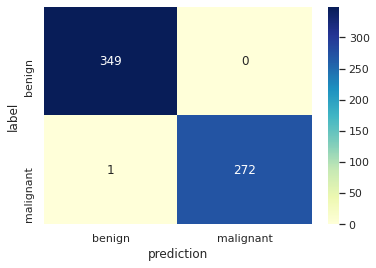

In [13]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [14]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.998392,349,272,1,0,1.000000,0.996337,0.997143,1.000000,0.003663,0.000000,0.002857,0.998168,0.998167
1,0.998392,272,349,0,1,0.996337,1.000000,1.000000,0.997143,0.000000,0.003663,0.000000,0.998168,0.998167


## ROC Curve

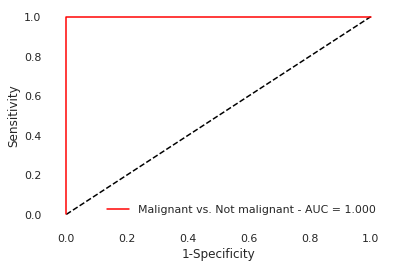

In [15]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

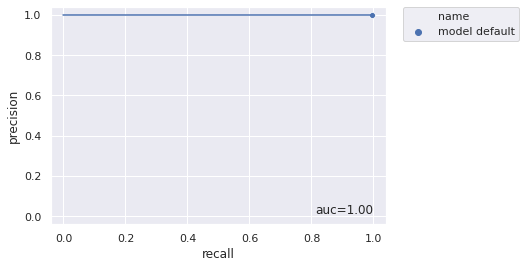

In [16]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [17]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
pm.record("validation_labels", list(validation_labels))
pm.record("validation_probabilities", list(probabilities[:,1]))
pm.record("validation_predictions", list(predictions))

In [18]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.7202380952380952


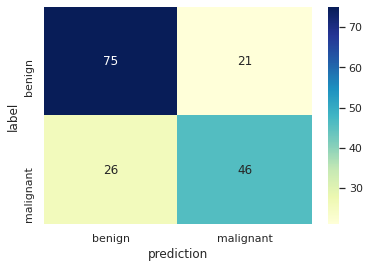

In [19]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [20]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.720238,75,46,26,21,0.781250,0.638889,0.742574,0.686567,0.361111,0.218750,0.257426,0.710069,0.706493
1,0.720238,46,75,21,26,0.638889,0.781250,0.686567,0.742574,0.218750,0.361111,0.313433,0.710069,0.706493


## ROC Curve

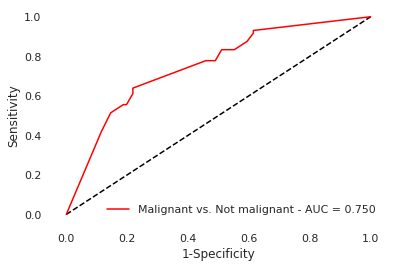

In [21]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

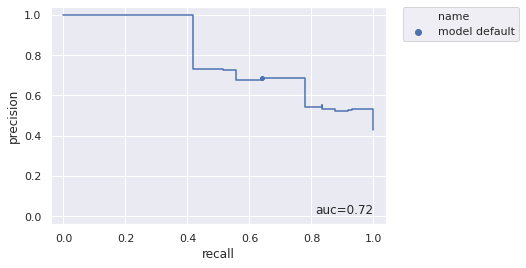

In [22]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [23]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
pm.record("test_labels", list(test_labels))
pm.record("test_probabilities", list(probabilities[:,1]))
pm.record("test_predictions", list(predictions))

In [24]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.6565656565656566


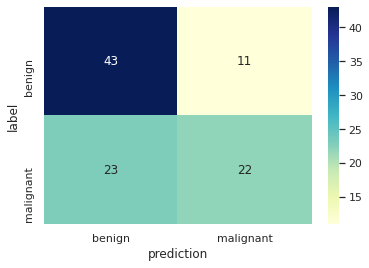

In [25]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [26]:
len(test_labels)

99

In [27]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.656566,43,22,23,11,0.796296,0.488889,0.651515,0.666667,0.511111,0.203704,0.348485,0.642593,0.623939
1,0.656566,22,43,11,23,0.488889,0.796296,0.666667,0.651515,0.203704,0.511111,0.333333,0.642593,0.623939


## ROC Curve

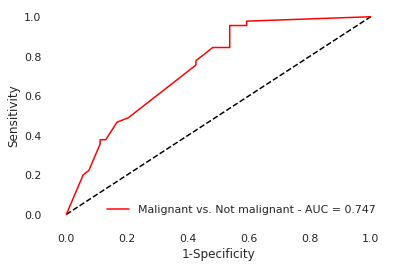

In [28]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

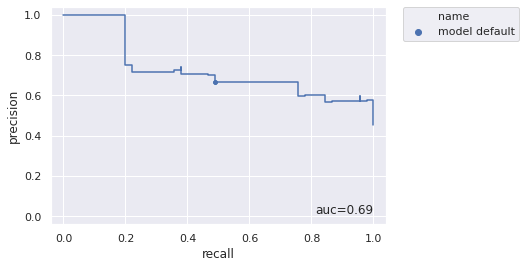

In [29]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

In [30]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')